# Project Viral App Predictor

## Goal:

* Find the drivers behind Google application downloads on the Google Play Store.
* Create a model that accurately predicts the likelihood an application will be downloaded 1 million or more times.
* Test the effectiveness of ensemble style models on accuracy. 


## Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import gen_wrangle1 as gw
import auto_model2a1 as am
#hide warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier




# <div class="alert alert-block alert-info">  Wrangle 
### Acquiring CSV
* Dataset name is titled Google PlayStore Apps
* Data acquired from Kaggel.com thanks to Gautham Prakash
* Each row represents a Google application
* Each column represents a feature

### Prepare:
* Loaded CSV file as a dataframe
* Renamed columns
* Encoded and dummied relevant features 
* Dropped all apps with less than 1000 downloads
* Dropped all apps that were created before or after 2020
* Created columns:
	* “Same_dev_id”
	* "days_since_release"

* Dropped unneeded columns: "installs","released","developer_email","developer_website","privacy_policy", “developer_id”
* Checked and fixed:
	* Nulls and NaNs
	* Data types
	* Downloads column: created a column “Viral” for the target variable (True/False categorical)
* Outliers: to be an outlier is the goal for app creation.

### Data Dictionary: 
* Explanation of dataset features



In [5]:
df=gw.get_csv("Google-Playstore.csv")

CSV found


In [3]:
df.head().T

,0,1,2,3,4
App Name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
App Id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
Category,Adventure,Tools,Productivity,Communication,Tools
Rating,0.0,4.4,0.0,5.0,0.0
Rating Count,0.0,64.0,0.0,5.0,0.0
Installs,10+,"5,000+",50+,10+,100+
Minimum Installs,10.0,5000.0,50.0,10.0,100.0
Maximum Installs,15,7662,58,19,478
Free,True,True,True,True,True
Price,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(2312944, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

### Fix Ugly Column Names

In [6]:
df = gw.clean_col(df)

In [7]:
df.head().T

,0,1,2,3,4
app_name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
app_id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
category,Adventure,Tools,Productivity,Communication,Tools
rating,0.0,4.4,0.0,5.0,0.0
rating_count,0.0,64.0,0.0,5.0,0.0
installs,10+,"5,000+",50+,10+,100+
minimum_installs,10.0,5000.0,50.0,10.0,100.0
maximum_installs,15,7662,58,19,478
free,True,True,True,True,True
price,0.0,0.0,0.0,0.0,0.0


In [7]:
df.drop(columns=['app_id', 'currency', 'scraped_time',"minimum_installs", "maximum_installs", "minimum_android","last_updated","rating_count"], inplace=True)

In [9]:
#sort df by price
df.sort_values(by='price', ascending=False).head().T

,544468,1539189,789532,1399820,268776
app_name,MESH Connect,Why Not,Acid Reflux Treatment,Most expensive word game,Taxes
category,Productivity,Lifestyle,Health & Fitness,Board,Business
rating,0.0,0.0,0.0,3.4,0.0
installs,10+,0+,1+,"5,000+",0+
free,False,False,False,False,False
price,400.0,399.99,399.99,399.99,399.99
size,20M,21k,3.5M,24M,3.4M
developer_id,Go Evo,Whynotstudio,Happy Healthy Apps,Vadaaa,business555
developer_website,http://www.go-evo.com,NaN,NaN,http://Vadaaa.com,NaN
developer_email,support@go-evo.com,dhwright98@gmail.com,info@internetphotos.net,f251s5@yahoo.com,woownoon2@gmail.com


### Check for Nulls

In [10]:
gw.is_it_null(df) 

False    2312942
True           2
Name: app_name, dtype: int64
False    2312944
Name: category, dtype: int64
False    2290061
True       22883
Name: rating, dtype: int64
False    2312837
True         107
Name: installs, dtype: int64
False    2312944
Name: free, dtype: int64
False    2312944
Name: price, dtype: int64
False    2312748
True         196
Name: size, dtype: int64
False    2312911
True          33
Name: developer_id, dtype: int64
False    1552109
True      760835
Name: developer_website, dtype: int64
False    2312913
True          31
Name: developer_email, dtype: int64
False    2241891
True       71053
Name: released, dtype: int64
False    2312944
Name: content_rating, dtype: int64
False    1891991
True      420953
Name: privacy_policy, dtype: int64
False    2312944
Name: ad_supported, dtype: int64
False    2312944
Name: in_app_purchases, dtype: int64
False    2312944
Name: editors_choice, dtype: int64


In [11]:
#sort nulls
df.isnull().sum().sort_values(ascending=False)

developer_website    760835
privacy_policy       420953
released              71053
rating                22883
size                    196
installs                107
developer_id             33
developer_email          31
app_name                  2
category                  0
free                      0
price                     0
content_rating            0
ad_supported              0
in_app_purchases          0
editors_choice            0
dtype: int64

In [8]:
#drop nulls in minimum_android, released
df.dropna(subset=['released'], inplace=True)
df.dropna(subset=["installs","app_name"],inplace=True)

In [9]:
#fill NaNs with right stuff
values = {"developer_website":"no website", "privacy_policy":"no policy", "developer_id":"no id", "developer_email":"no email", "rating": 0}
df.fillna(value=values, inplace=True)




### Fix Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241882 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   app_name           object 
 1   category           object 
 2   rating             float64
 3   installs           object 
 4   free               bool   
 5   price              float64
 6   size               object 
 7   developer_id       object 
 8   developer_website  object 
 9   developer_email    object 
 10  released           object 
 11  content_rating     object 
 12  privacy_policy     object 
 13  ad_supported       bool   
 14  in_app_purchases   bool   
 15  editors_choice     bool   
dtypes: bool(4), float64(2), object(10)
memory usage: 230.9+ MB


In [10]:
#in installs replace "+" with "" and change dtype to int
df.installs = df.installs.str.replace("+", "").str.replace(",", "").astype(int)


In [11]:
df["file_size"] = df["size"]

In [12]:
df.drop(columns=["size"], inplace=True)

In [13]:
df.file_size = df.file_size.str.replace("M", "000").str.replace("k", "").str.replace("Varies with device", "22500").str.replace(",","").str.replace("G","000000").astype(float)

In [14]:
df.released = pd.to_datetime(df.released, format='%b %d, %Y')

In [15]:
#total number of rows by release year
df.released.dt.year.value_counts()


2020    544882
2019    480662
2018    334563
2017    259685
2021    180507
2016    167112
2015    115431
2014     71815
2013     42476
2012     25747
2011     14361
2010      4641
Name: released, dtype: int64

### Making it fair by dropping everthing before and after 2020

In [16]:
#drop rows with release year before 2020 and after 2021
df = df[(df.released.dt.year >= 2020) & (df.released.dt.year < 2021)]


In [85]:
df.released.dt.year.value_counts()

2020    544882
Name: released, dtype: int64

In [17]:
col_list = ["content_rating","category"]
df = gw.encode(df, col_list)

In [18]:
#replace developer_webiste values with boolean
df.developer_website = df.developer_website.str.replace("no website", "False").str.replace("https://", "True").astype(bool)
#replace privacy_policy values with boolean
df.privacy_policy = df.privacy_policy.str.replace("no policy", "False").str.replace("http://", "True").astype(bool)
#replace developer_email values with boolean
df.developer_email = df.developer_email.str.replace("no email", "False").str.replace("mailto:", "True").astype(bool)

In [25]:
df.head()

,app_name,rating,installs,free,price,developer_id,developer_website,developer_email,released,privacy_policy,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Gakondo,0.0,10,True,0.0,Jean Confident Irénée NIYIZIBYOSE,True,True,2020-02-26,True,...,0,0,0,0,0,0,0,0,0,0
1,Ampere Battery Info,4.4,5000,True,0.0,Webserveis,True,True,2020-05-21,True,...,0,0,0,0,1,0,0,0,0,0
4,GROW.me,0.0,100,True,0.0,Rafal Milek-Horodyski,True,True,2020-02-21,True,...,0,0,0,0,1,0,0,0,0,0
10,Dodge The Cars!,4.9,100,True,0.0,MrScratch,True,True,2020-07-30,True,...,0,0,0,0,0,0,0,0,0,0
13,be.MOBILISED,0.0,100,True,0.0,has.to.be gmbh,True,True,2020-02-09,True,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#make new column for days since release
df["days_since_release"] = (pd.to_datetime("2021-06-15") - df.released).dt.days

### Feature eng 

In [20]:
#maken new column for rows with same developer_id thats boolean
df["same_dev_id"] = df.duplicated(subset=["developer_id"])

In [21]:
df.drop(columns=["developer_id"], inplace=True)

In [29]:
df.free.value_counts()

True     539628
False      5254
Name: free, dtype: int64

### Create the Target Var column

In [22]:
#create new column for rows with a 1000000 or more dowloads thats boolean
df["viral"] = df.installs >= 1000000


In [19]:
df.viral.value_counts() 

False    541015
True       3867
Name: viral, dtype: int64

### limit Df to only apps with at least 1000 DLs

In [23]:
#drop rows with less than 1000 downloads
df = df[df.installs >= 1000]

### Drop unneeded columns

In [24]:
df = df.drop(columns=["installs","released","developer_email","developer_website","privacy_policy"])

### encode 

In [25]:
#change all bools to 1s and 0s
df = gw.bool_to_int(df)



### univareate exploration

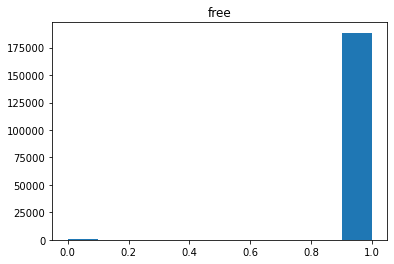

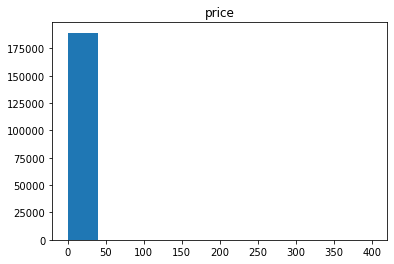

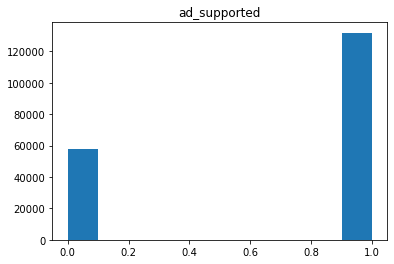

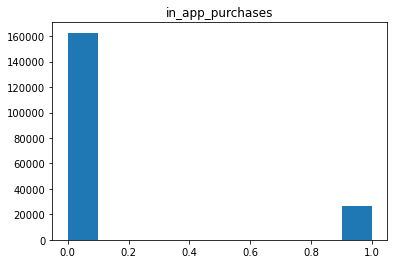

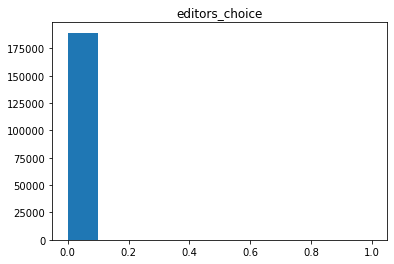

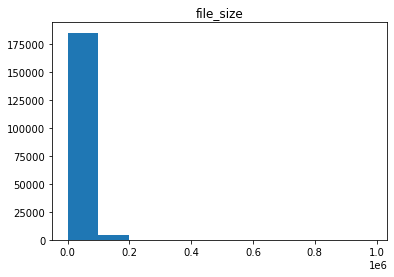

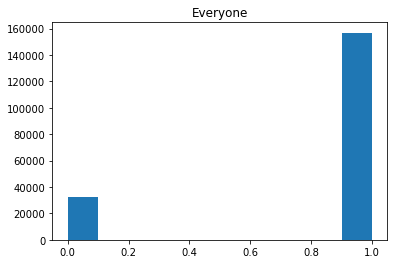

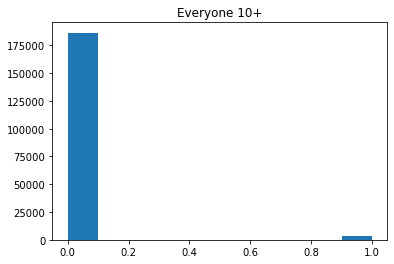

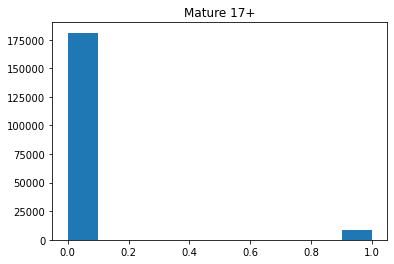

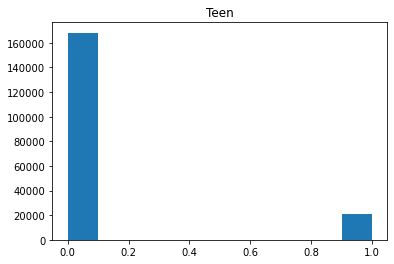

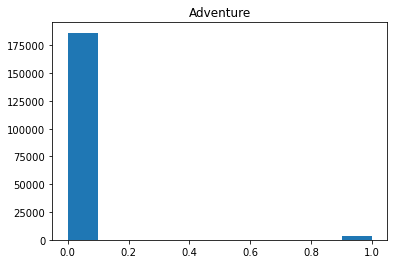

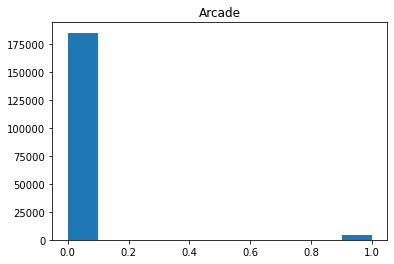

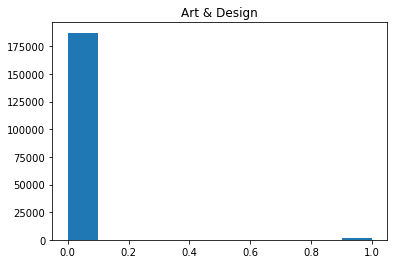

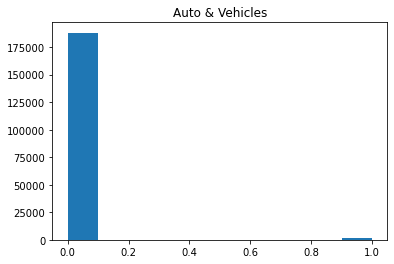

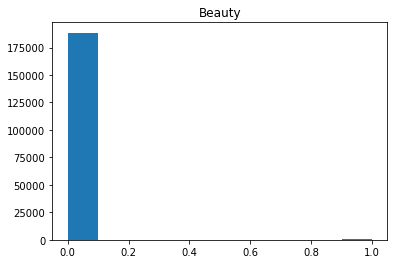

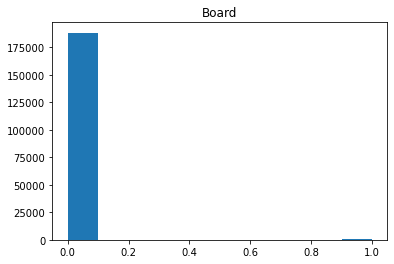

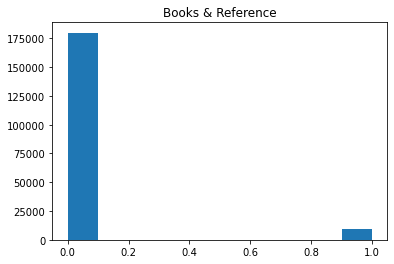

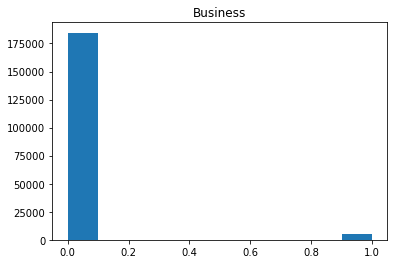

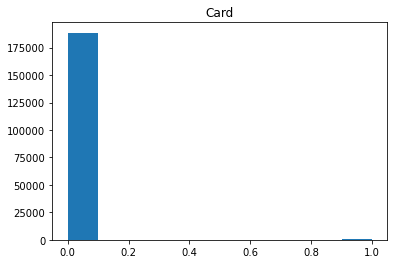

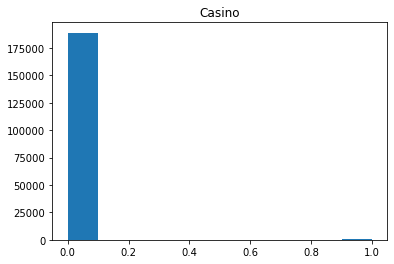

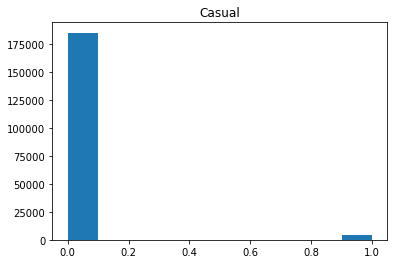

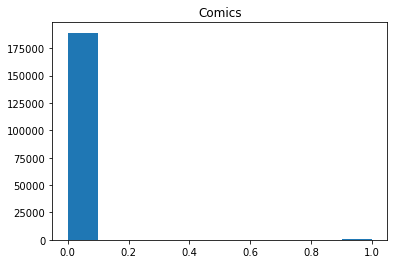

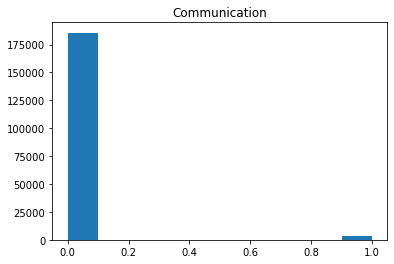

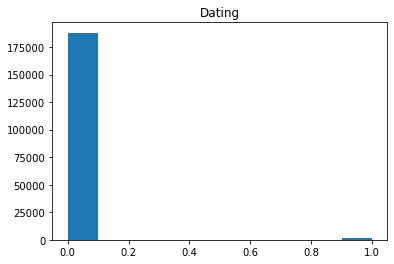

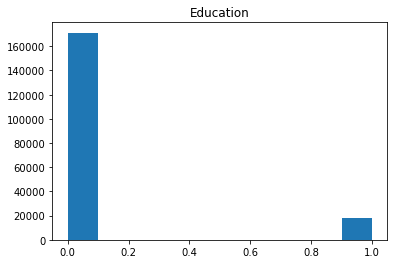

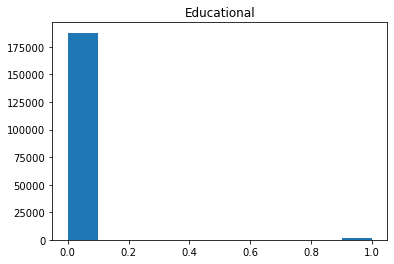

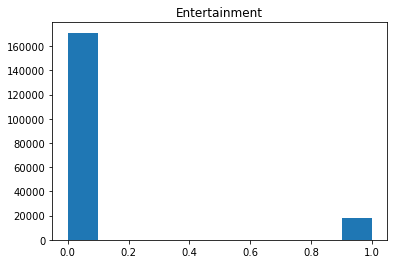

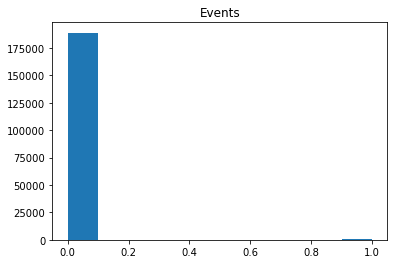

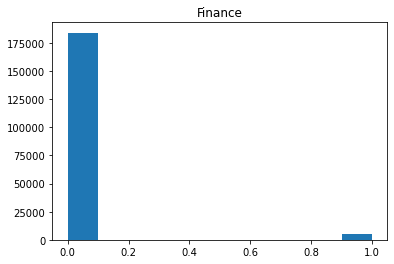

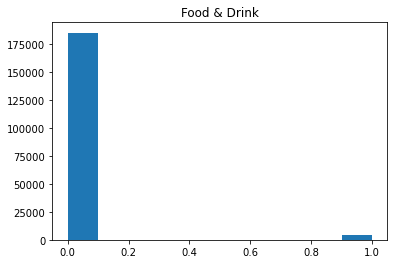

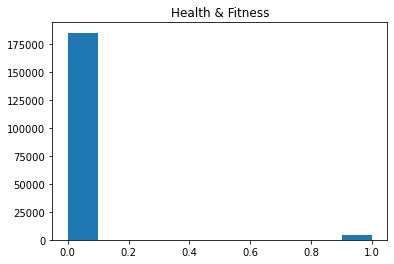

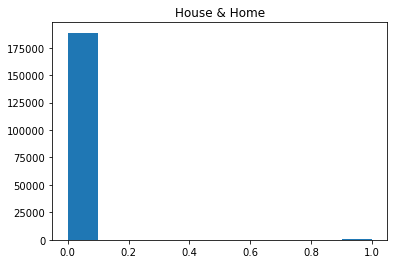

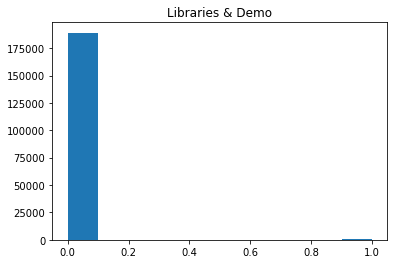

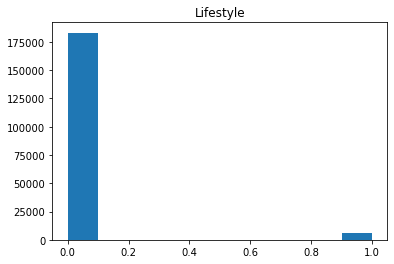

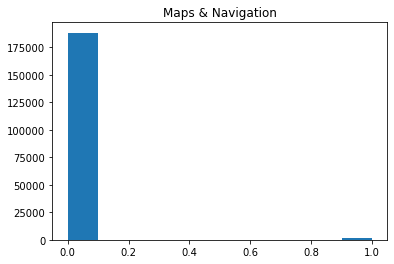

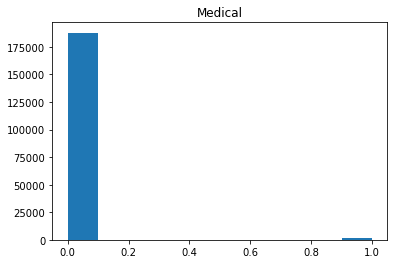

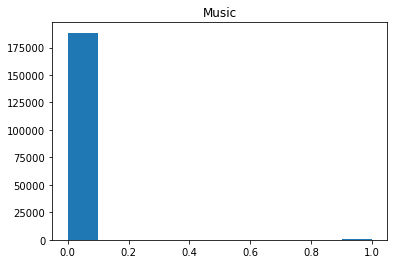

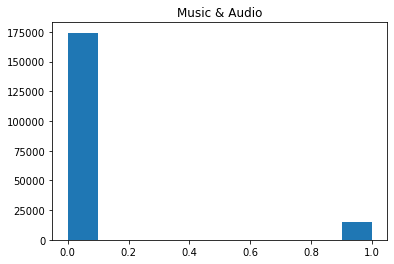

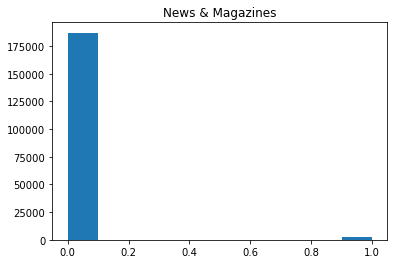

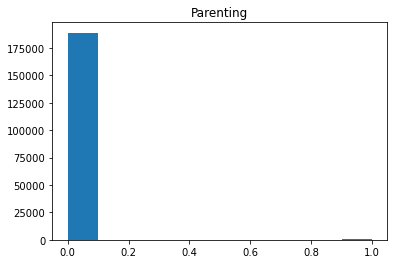

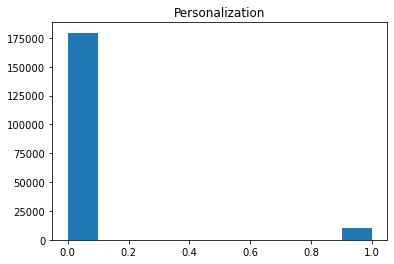

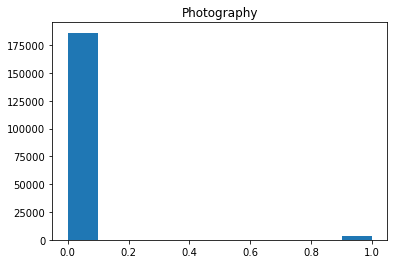

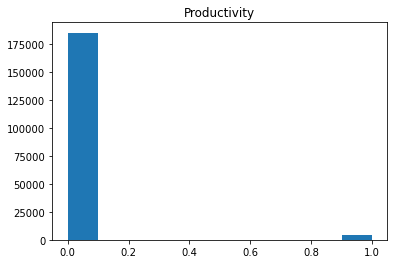

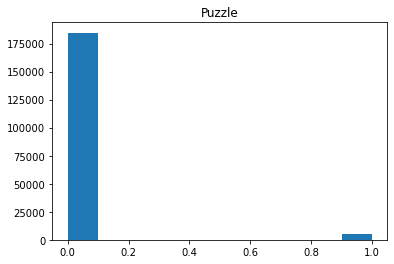

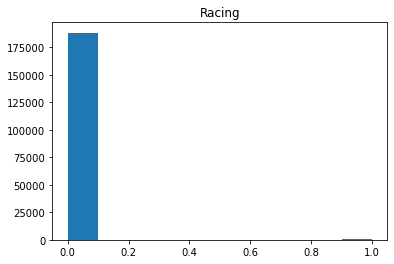

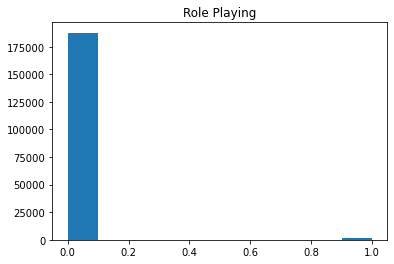

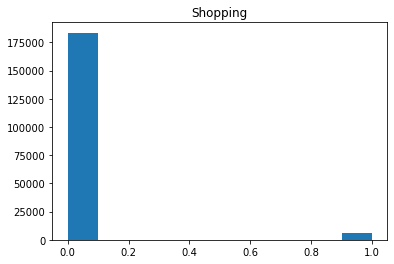

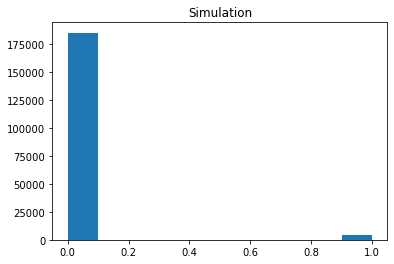

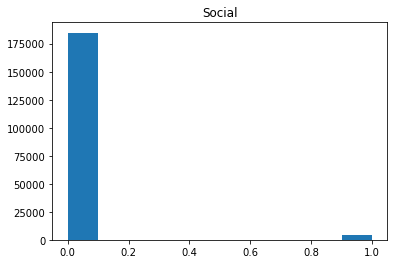

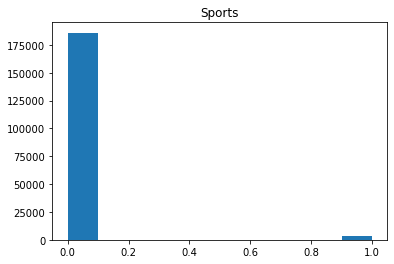

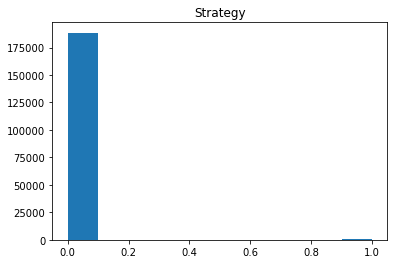

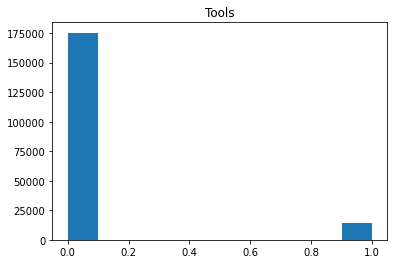

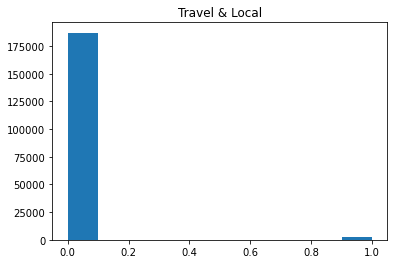

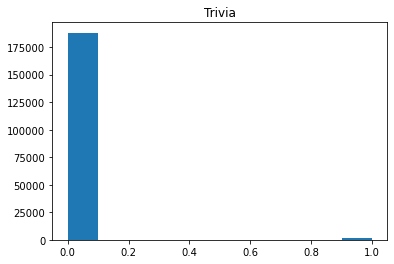

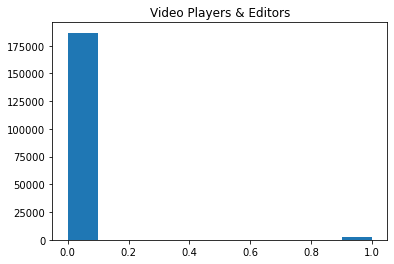

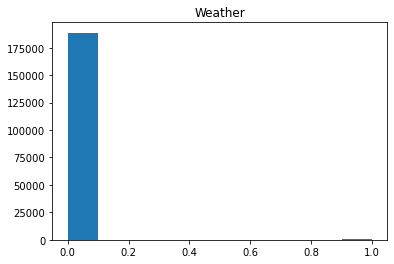

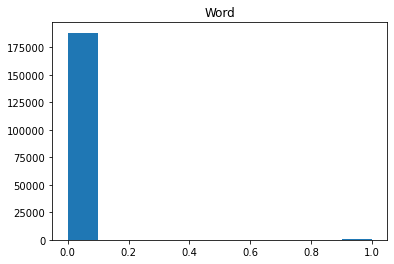

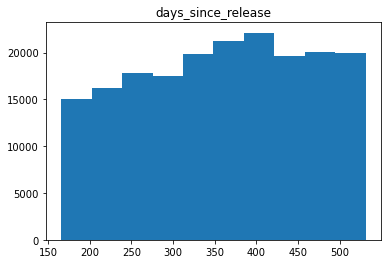

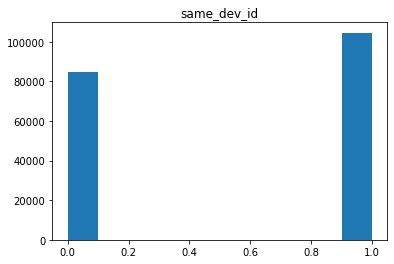

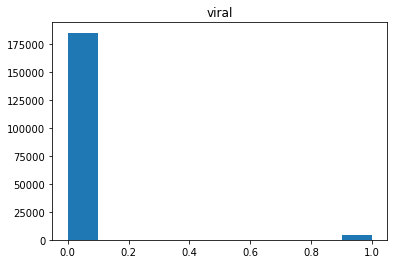

In [35]:
gw.plot_uni_var(df)

### Split

In [26]:
#Split
train_df, validate_df, test_df = gw.split_function_cat_target(df, 'viral')

In [37]:
train_df.shape

(113648, 62)

In [38]:
validate_df.shape

(37883, 62)

In [39]:
train_df.head()

,app_name,rating,free,price,ad_supported,in_app_purchases,editors_choice,file_size,Everyone,Everyone 10+,...,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,days_since_release,same_dev_id,viral
2125487,Lollipop Animal,4.4,1,0.0,1,1,0,53000.0,1,0,...,0,0,0,0,0,0,0,370,0,0
978016,kiki tell,4.0,1,0.0,0,0,0,6.7,1,0,...,0,0,0,0,0,0,0,510,1,0
1291503,Short Video Maker-Made in India,4.0,1,0.0,1,0,0,13000.0,1,0,...,0,0,0,0,0,0,0,181,0,0
383660,كويكول - حنان لاشين,4.8,1,0.0,1,0,0,11000.0,1,0,...,0,0,0,0,0,0,0,406,1,0
81001,চৈতন্যচরিতামৃত মধ্যলীলা (Chaitanya Charitamrita),0.0,1,0.0,1,0,0,99000.0,1,0,...,0,0,0,0,0,0,0,275,0,0


<div class="alert alert-block alert-info"> 
    
## Explore
    
### Questions To Answer:
1. What features affect if an hits 1 million+ downloads
2. What are the best features to use

In [40]:
gw.cat_and_num_lists(train_df)

The categorical variables are: 
 ['free', 'ad_supported', 'in_app_purchases', 'editors_choice', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word', 'same_dev_id', 'viral'] 

The continuous variables are: 
 ['rating', 'price', 'file_size', 'days_since_release'] 



(['free',
  'ad_supported',
  'in_app_purchases',
  'editors_choice',
  'Everyone',
  'Everyone 10+',
  'Mature 17+',
  'Teen',
  'Adventure',
  'Arcade',
  'Art & Design',
  'Auto & Vehicles',
  'Beauty',
  'Board',
  'Books & Reference',
  'Business',
  'Card',
  'Casino',
  'Casual',
  'Comics',
  'Communication',
  'Dating',
  'Education',
  'Educational',
  'Entertainment',
  'Events',
  'Finance',
  'Food & Drink',
  'Health & Fitness',
  'House & Home',
  'Libraries & Demo',
  'Lifestyle',
  'Maps & Navigation',
  'Medical',
  'Music',
  'Music & Audio',
  'News & Magazines',
  'Parenting',
  'Personalization',
  'Photography',
  'Productivity',
  'Puzzle',
  'Racing',
  'Role Playing',
  'Shopping',
  'Simulation',
  'Social',
  'Sports',
  'Strategy',
  'Tools',
  'Travel & Local',
  'Trivia',
  'Video Players & Editors',
  'Weather',
  'Word',
  'same_dev_id',
  'viral'],
 ['rating', 'price', 'file_size', 'days_since_release'])

The categorical variables are: 
 ['free', 'ad_supported', 'in_app_purchases', 'editors_choice', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word', 'same_dev_id', 'viral'] 

The continuous variables are: 
 ['rating', 'price', 'file_size', 'days_since_release'] 

RATING and viral


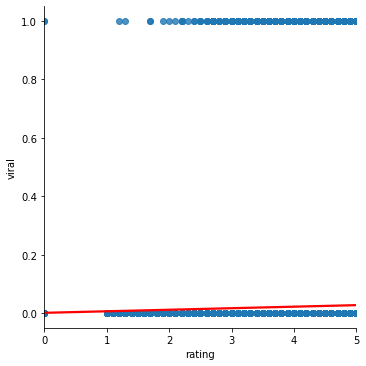

PRICE and viral


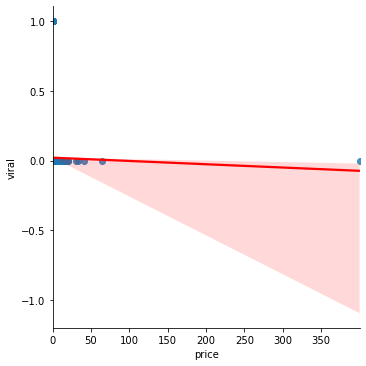

FILE_SIZE and viral


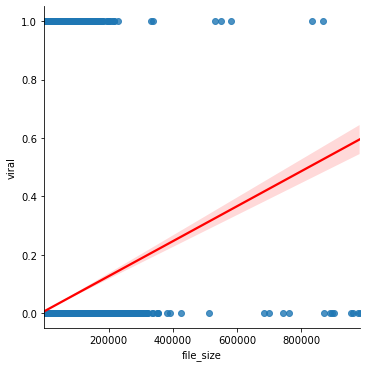

DAYS_SINCE_RELEASE and viral


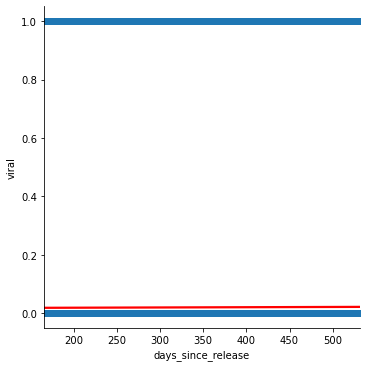

In [41]:
gw.plot_variable_target_pairs(train_df,"viral")

The categorical variables are: 
 ['free', 'ad_supported', 'in_app_purchases', 'editors_choice', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word', 'same_dev_id', 'viral'] 

The continuous variables are: 
 ['rating', 'price', 'file_size', 'days_since_release'] 


FREE
1    113187
0       461
Name: free, dtype: int64
1    0.995944
0    0.004056
Name: free, 

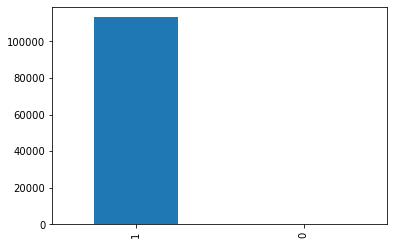



HYPOTHESIZE
H_0: free does not affect viral
H_a: free affects viral

VISUALIZE


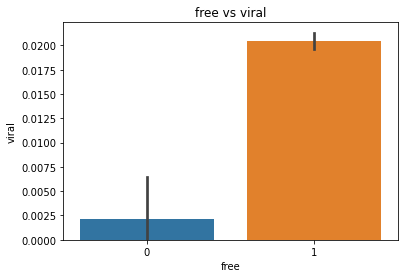


ANALYZE and SUMMARIZE
Observed
[[   460      1]
 [110868   2319]]

Expected
[[   451      9]
 [110876   2310]]

----
chi^2 = 6.8161
p-value = 0.0090
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

AD_SUPPORTED
1    79103
0    34545
Name: ad_supported, dtype: int64
1    0.696035
0    0.303965
Name: ad_supported, dtype: float64


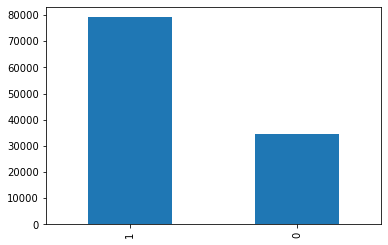



HYPOTHESIZE
H_0: ad supported does not affect viral
H_a: ad supported affects viral

VISUALIZE


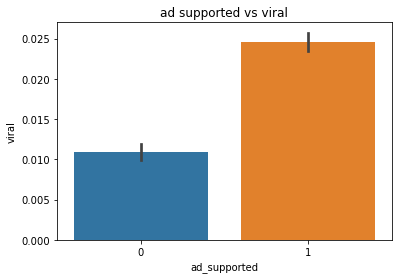


ANALYZE and SUMMARIZE
Observed
[[34168   377]
 [77160  1943]]

Expected
[[33839   705]
 [77488  1614]]

----
chi^2 = 223.3386
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

IN_APP_PURCHASES
0    97633
1    16015
Name: in_app_purchases, dtype: int64
0    0.859082
1    0.140918
Name: in_app_purchases, dtype: float64


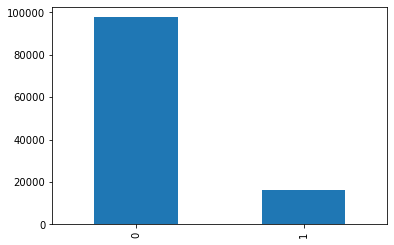



HYPOTHESIZE
H_0: in app purchases does not affect viral
H_a: in app purchases affects viral

VISUALIZE


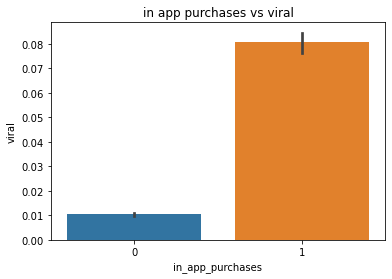


ANALYZE and SUMMARIZE
Observed
[[96604  1029]
 [14724  1291]]

Expected
[[95639  1993]
 [15688   326]]

----
chi^2 = 3374.7148
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

EDITORS_CHOICE
0    113611
1        37
Name: editors_choice, dtype: int64
0    0.999674
1    0.000326
Name: editors_choice, dtype: float64


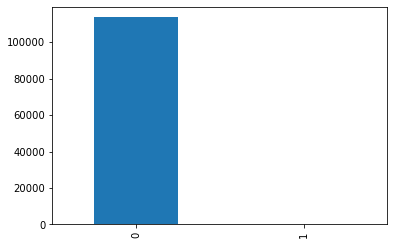



HYPOTHESIZE
H_0: editors choice does not affect viral
H_a: editors choice affects viral

VISUALIZE


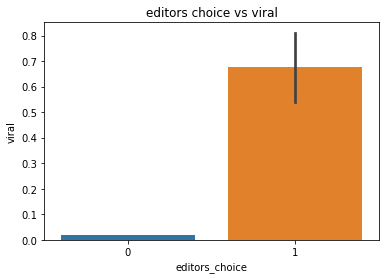


ANALYZE and SUMMARIZE
Observed
[[111316   2295]
 [    12     25]]

Expected
[[111291   2319]
 [    36      0]]

----
chi^2 = 762.2611
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

EVERYONE
1    94143
0    19505
Name: Everyone, dtype: int64
1    0.828374
0    0.171626
Name: Everyone, dtype: float64


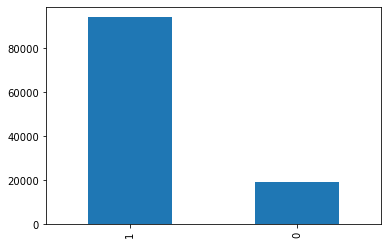



HYPOTHESIZE
H_0: everyone does not affect viral
H_a: everyone affects viral

VISUALIZE


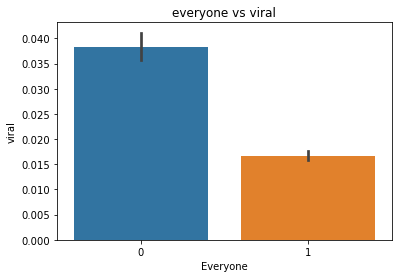


ANALYZE and SUMMARIZE
Observed
[[18758   747]
 [92570  1573]]

Expected
[[19106   398]
 [92221  1921]]

----
chi^2 = 375.5195
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

EVERYONE 10+
0    111824
1      1824
Name: Everyone 10+, dtype: int64
0    0.98395
1    0.01605
Name: Everyone 10+, dtype: float64


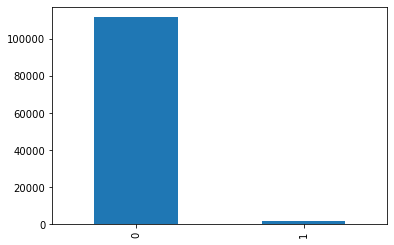



HYPOTHESIZE
H_0: everyone 10+ does not affect viral
H_a: everyone 10+ affects viral

VISUALIZE


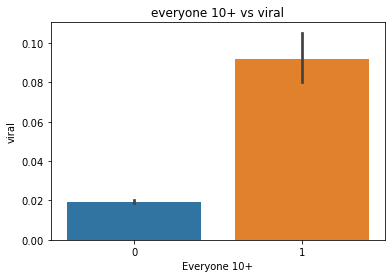


ANALYZE and SUMMARIZE
Observed
[[109672   2152]
 [  1656    168]]

Expected
[[109541   2282]
 [  1786     37]]

----
chi^2 = 472.8124
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

MATURE 17+
0    108604
1      5044
Name: Mature 17+, dtype: int64
0    0.955617
1    0.044383
Name: Mature 17+, dtype: float64


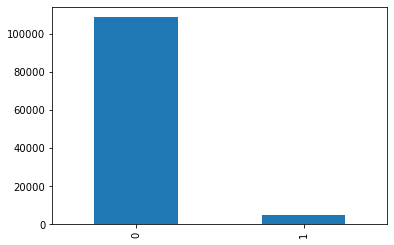



HYPOTHESIZE
H_0: mature 17+ does not affect viral
H_a: mature 17+ affects viral

VISUALIZE


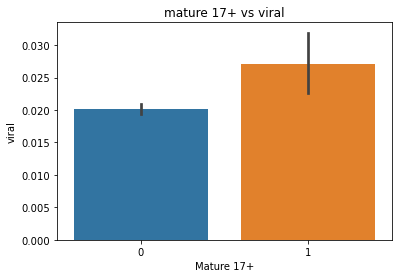


ANALYZE and SUMMARIZE
Observed
[[106421   2183]
 [  4907    137]]

Expected
[[106386   2217]
 [  4941    102]]

----
chi^2 = 11.6653
p-value = 0.0006
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

TEEN
0    101014
1     12634
Name: Teen, dtype: int64
0    0.888832
1    0.111168
Name: Teen, dtype: float64


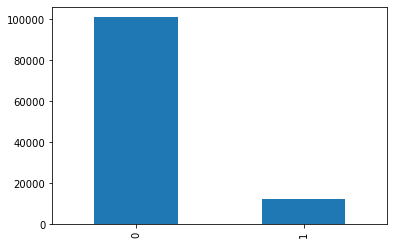



HYPOTHESIZE
H_0: teen does not affect viral
H_a: teen affects viral

VISUALIZE


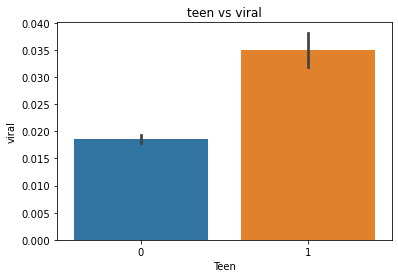


ANALYZE and SUMMARIZE
Observed
[[99136  1878]
 [12192   442]]

Expected
[[98951  2062]
 [12376   257]]

----
chi^2 = 150.0969
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

ADVENTURE
0    111869
1      1779
Name: Adventure, dtype: int64
0    0.984346
1    0.015654
Name: Adventure, dtype: float64


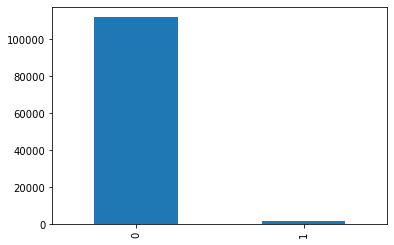



HYPOTHESIZE
H_0: adventure does not affect viral
H_a: adventure affects viral

VISUALIZE


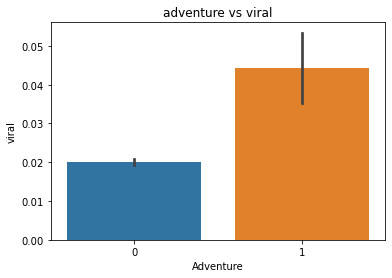


ANALYZE and SUMMARIZE
Observed
[[109628   2241]
 [  1700     79]]

Expected
[[109585   2283]
 [  1742     36]]

----
chi^2 = 50.8154
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

ARCADE
0    111278
1      2370
Name: Arcade, dtype: int64
0    0.979146
1    0.020854
Name: Arcade, dtype: float64


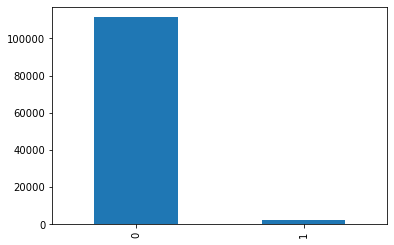



HYPOTHESIZE
H_0: arcade does not affect viral
H_a: arcade affects viral

VISUALIZE


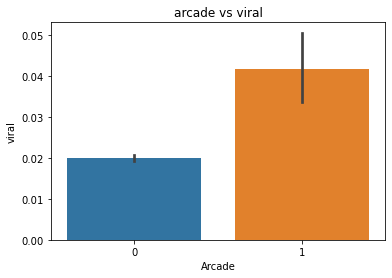


ANALYZE and SUMMARIZE
Observed
[[109057   2221]
 [  2271     99]]

Expected
[[109006   2271]
 [  2321     48]]

----
chi^2 = 54.1303
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

ART & DESIGN
0    112407
1      1241
Name: Art & Design, dtype: int64
0    0.98908
1    0.01092
Name: Art & Design, dtype: float64


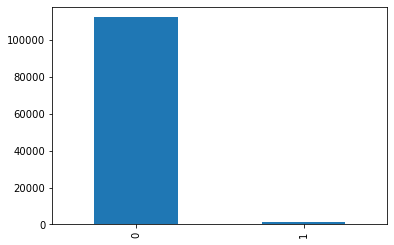



HYPOTHESIZE
H_0: art & design does not affect viral
H_a: art & design affects viral

VISUALIZE


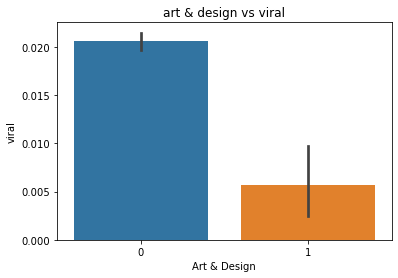


ANALYZE and SUMMARIZE
Observed
[[110094   2313]
 [  1234      7]]

Expected
[[110112   2294]
 [  1215     25]]

----
chi^2 = 12.9571
p-value = 0.0003
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

AUTO & VEHICLES
0    112874
1       774
Name: Auto & Vehicles, dtype: int64
0    0.993189
1    0.006811
Name: Auto & Vehicles, dtype: float64


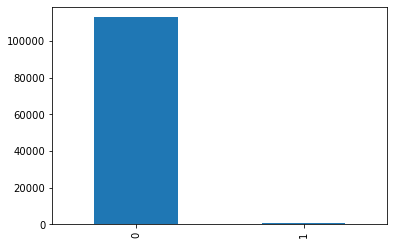



HYPOTHESIZE
H_0: auto & vehicles does not affect viral
H_a: auto & vehicles affects viral

VISUALIZE


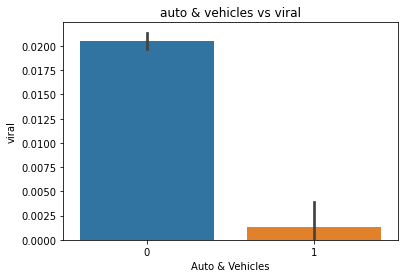


ANALYZE and SUMMARIZE
Observed
[[110555   2319]
 [   773      1]]

Expected
[[110569   2304]
 [   758     15]]

----
chi^2 = 13.3031
p-value = 0.0003
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

BEAUTY
0    113122
1       526
Name: Beauty, dtype: int64
0    0.995372
1    0.004628
Name: Beauty, dtype: float64


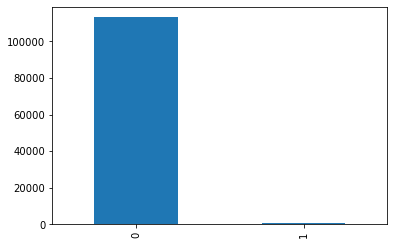



HYPOTHESIZE
H_0: beauty does not affect viral
H_a: beauty affects viral

VISUALIZE


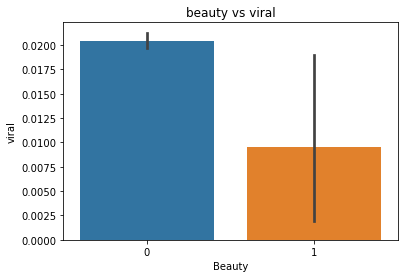


ANALYZE and SUMMARIZE
Observed
[[110807   2315]
 [   521      5]]

Expected
[[110812   2309]
 [   515     10]]

----
chi^2 = 2.6203
p-value = 0.1055
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

BOARD
0    112962
1       686
Name: Board, dtype: int64
0    0.993964
1    0.006036
Name: Board, dtype: float64


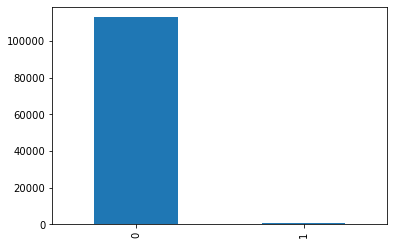



HYPOTHESIZE
H_0: board does not affect viral
H_a: board affects viral

VISUALIZE


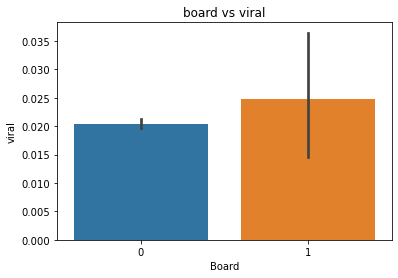


ANALYZE and SUMMARIZE
Observed
[[110659   2303]
 [   669     17]]

Expected
[[110656   2305]
 [   671     14]]

----
chi^2 = 0.4569
p-value = 0.4991
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

BOOKS & REFERENCE
0    107934
1      5714
Name: Books & Reference, dtype: int64
0    0.949722
1    0.050278
Name: Books & Reference, dtype: float64


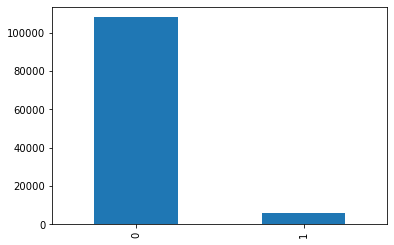



HYPOTHESIZE
H_0: books & reference does not affect viral
H_a: books & reference affects viral

VISUALIZE


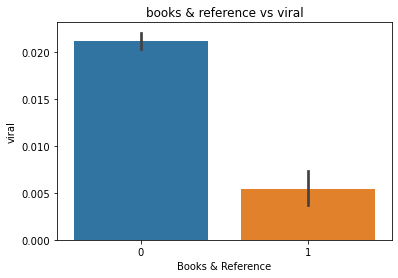


ANALYZE and SUMMARIZE
Observed
[[105645   2289]
 [  5683     31]]

Expected
[[105730   2203]
 [  5597    116]]

----
chi^2 = 66.8057
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

BUSINESS
0    110703
1      2945
Name: Business, dtype: int64
0    0.974087
1    0.025913
Name: Business, dtype: float64


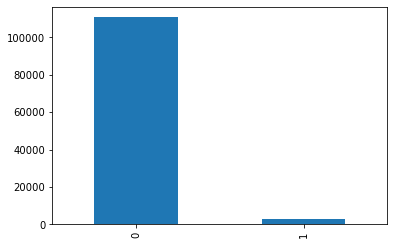



HYPOTHESIZE
H_0: business does not affect viral
H_a: business affects viral

VISUALIZE


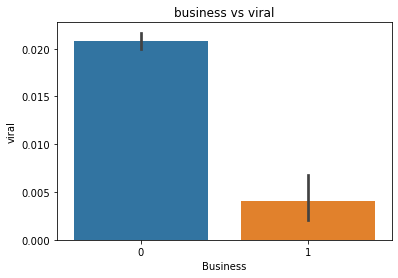


ANALYZE and SUMMARIZE
Observed
[[108395   2308]
 [  2933     12]]

Expected
[[108443   2259]
 [  2884     60]]

----
chi^2 = 39.5283
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

CARD
0    113117
1       531
Name: Card, dtype: int64
0    0.995328
1    0.004672
Name: Card, dtype: float64


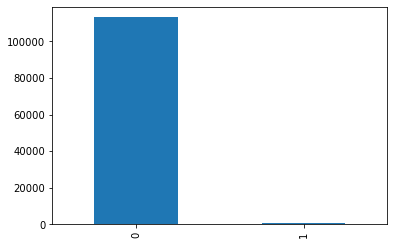



HYPOTHESIZE
H_0: card does not affect viral
H_a: card affects viral

VISUALIZE


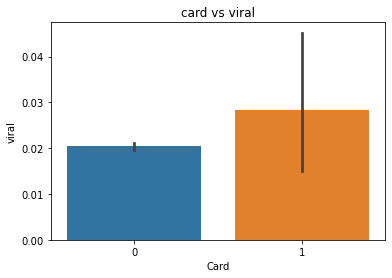


ANALYZE and SUMMARIZE
Observed
[[110812   2305]
 [   516     15]]

Expected
[[110807   2309]
 [   520     10]]

----
chi^2 = 1.2676
p-value = 0.2602
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

CASINO
0    113289
1       359
Name: Casino, dtype: int64
0    0.996841
1    0.003159
Name: Casino, dtype: float64


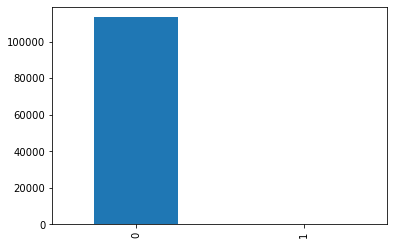



HYPOTHESIZE
H_0: casino does not affect viral
H_a: casino affects viral

VISUALIZE


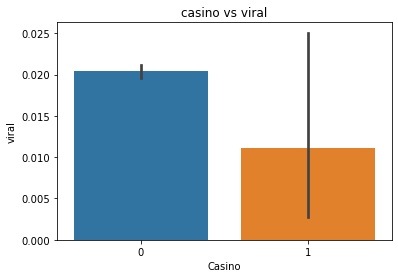


ANALYZE and SUMMARIZE
Observed
[[110973   2316]
 [   355      4]]

Expected
[[110976   2312]
 [   351      7]]

----
chi^2 = 1.1180
p-value = 0.2903
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

CASUAL
0    110965
1      2683
Name: Casual, dtype: int64
0    0.976392
1    0.023608
Name: Casual, dtype: float64


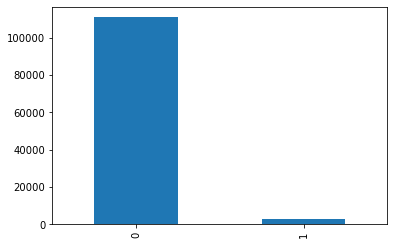



HYPOTHESIZE
H_0: casual does not affect viral
H_a: casual affects viral

VISUALIZE


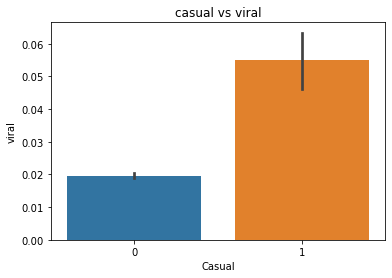


ANALYZE and SUMMARIZE
Observed
[[108793   2172]
 [  2535    148]]

Expected
[[108699   2265]
 [  2628     54]]

----
chi^2 = 164.1428
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

COMICS
0    113471
1       177
Name: Comics, dtype: int64
0    0.998443
1    0.001557
Name: Comics, dtype: float64


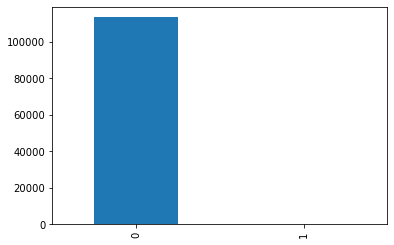



HYPOTHESIZE
H_0: comics does not affect viral
H_a: comics affects viral

VISUALIZE


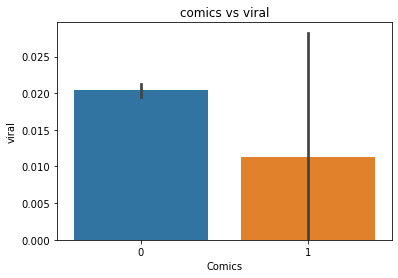


ANALYZE and SUMMARIZE
Observed
[[111153   2318]
 [   175      2]]

Expected
[[111154   2316]
 [   173      3]]

----
chi^2 = 0.3507
p-value = 0.5537
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

COMMUNICATION
0    111368
1      2280
Name: Communication, dtype: int64
0    0.979938
1    0.020062
Name: Communication, dtype: float64


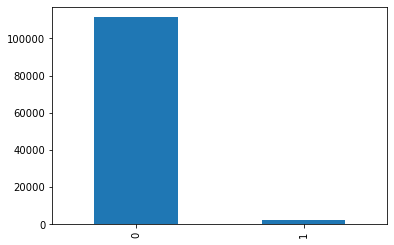



HYPOTHESIZE
H_0: communication does not affect viral
H_a: communication affects viral

VISUALIZE


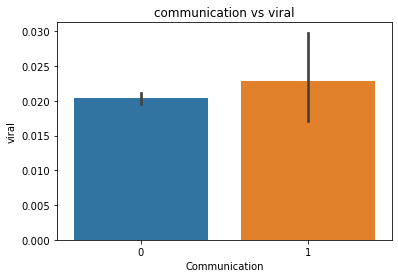


ANALYZE and SUMMARIZE
Observed
[[109100   2268]
 [  2228     52]]

Expected
[[109094   2273]
 [  2233     46]]

----
chi^2 = 0.5498
p-value = 0.4584
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

DATING
0    112734
1       914
Name: Dating, dtype: int64
0    0.991958
1    0.008042
Name: Dating, dtype: float64


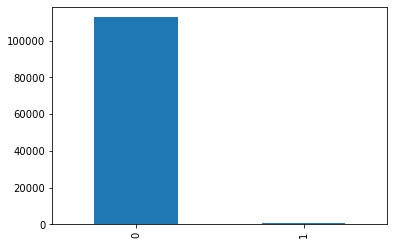



HYPOTHESIZE
H_0: dating does not affect viral
H_a: dating affects viral

VISUALIZE


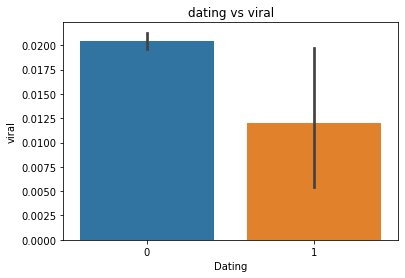


ANALYZE and SUMMARIZE
Observed
[[110425   2309]
 [   903     11]]

Expected
[[110432   2301]
 [   895     18]]

----
chi^2 = 2.8263
p-value = 0.0927
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

EDUCATION
0    102725
1     10923
Name: Education, dtype: int64
0    0.903887
1    0.096113
Name: Education, dtype: float64


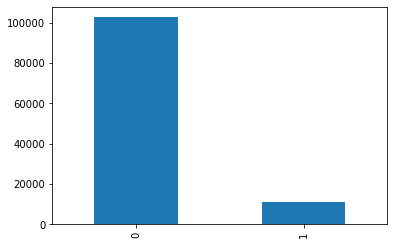



HYPOTHESIZE
H_0: education does not affect viral
H_a: education affects viral

VISUALIZE


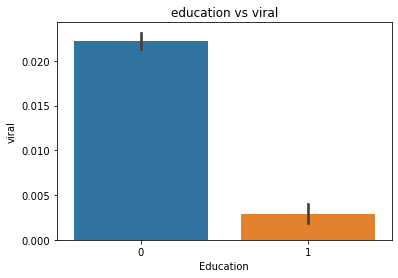


ANALYZE and SUMMARIZE
Observed
[[100437   2288]
 [ 10891     32]]

Expected
[[100627   2097]
 [ 10700    222]]

----
chi^2 = 183.7718
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

EDUCATIONAL
0    112676
1       972
Name: Educational, dtype: int64
0    0.991447
1    0.008553
Name: Educational, dtype: float64


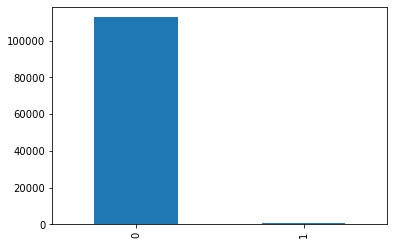



HYPOTHESIZE
H_0: educational does not affect viral
H_a: educational affects viral

VISUALIZE


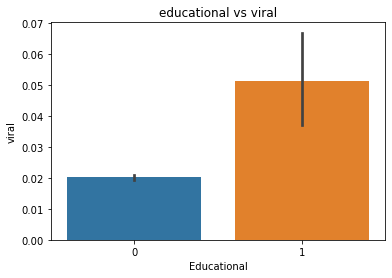


ANALYZE and SUMMARIZE
Observed
[[110406   2270]
 [   922     50]]

Expected
[[110375   2300]
 [   952     19]]

----
chi^2 = 45.6425
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

ENTERTAINMENT
0    102686
1     10962
Name: Entertainment, dtype: int64
0    0.903544
1    0.096456
Name: Entertainment, dtype: float64


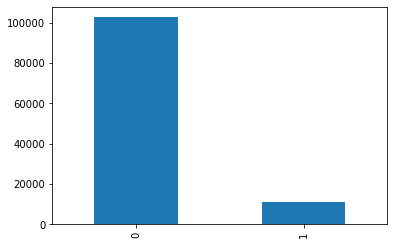



HYPOTHESIZE
H_0: entertainment does not affect viral
H_a: entertainment affects viral

VISUALIZE


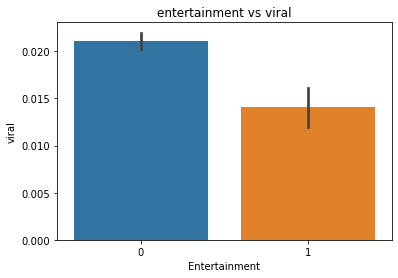


ANALYZE and SUMMARIZE
Observed
[[100520   2166]
 [ 10808    154]]

Expected
[[100589   2096]
 [ 10738    223]]

----
chi^2 = 24.2311
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

EVENTS
0    113374
1       274
Name: Events, dtype: int64
0    0.997589
1    0.002411
Name: Events, dtype: float64


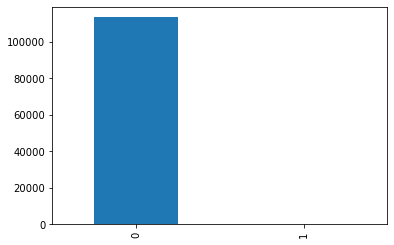



HYPOTHESIZE
H_0: events does not affect viral
H_a: events affects viral

VISUALIZE


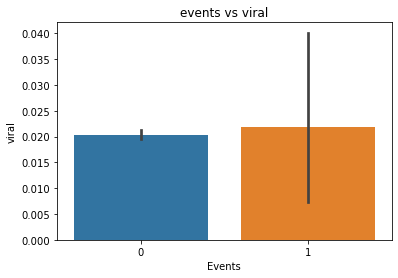


ANALYZE and SUMMARIZE
Observed
[[111060   2314]
 [   268      6]]

Expected
[[111059   2314]
 [   268      5]]

----
chi^2 = 0.0016
p-value = 0.9681
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

FINANCE
0    110543
1      3105
Name: Finance, dtype: int64
0    0.972679
1    0.027321
Name: Finance, dtype: float64


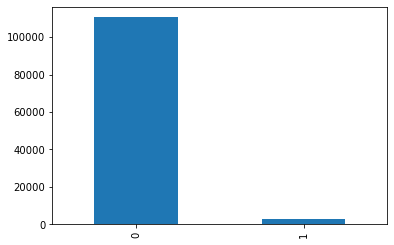



HYPOTHESIZE
H_0: finance does not affect viral
H_a: finance affects viral

VISUALIZE


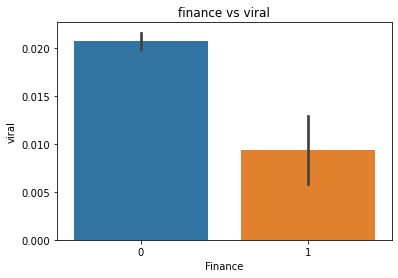


ANALYZE and SUMMARIZE
Observed
[[108252   2291]
 [  3076     29]]

Expected
[[108286   2256]
 [  3041     63]]

----
chi^2 = 19.0117
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

FOOD & DRINK
0    111289
1      2359
Name: Food & Drink, dtype: int64
0    0.979243
1    0.020757
Name: Food & Drink, dtype: float64


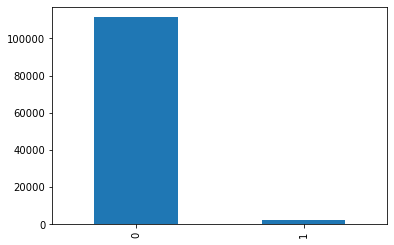



HYPOTHESIZE
H_0: food & drink does not affect viral
H_a: food & drink affects viral

VISUALIZE


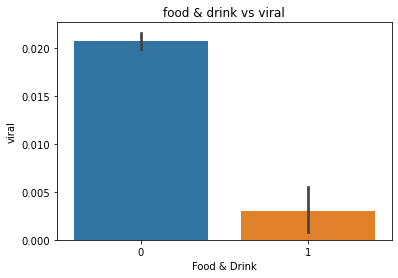


ANALYZE and SUMMARIZE
Observed
[[108976   2313]
 [  2352      7]]

Expected
[[109017   2271]
 [  2310     48]]

----
chi^2 = 35.7825
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

HEALTH & FITNESS
0    110857
1      2791
Name: Health & Fitness, dtype: int64
0    0.975442
1    0.024558
Name: Health & Fitness, dtype: float64


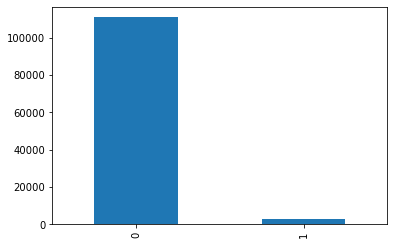



HYPOTHESIZE
H_0: health & fitness does not affect viral
H_a: health & fitness affects viral

VISUALIZE


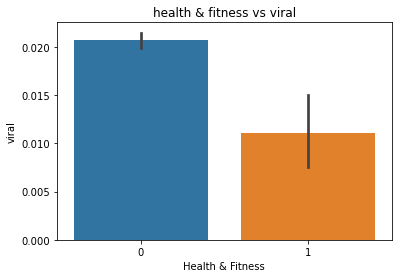


ANALYZE and SUMMARIZE
Observed
[[108568   2289]
 [  2760     31]]

Expected
[[108593   2263]
 [  2734     56]]

----
chi^2 = 11.9208
p-value = 0.0006
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

HOUSE & HOME
0    113194
1       454
Name: House & Home, dtype: int64
0    0.996005
1    0.003995
Name: House & Home, dtype: float64


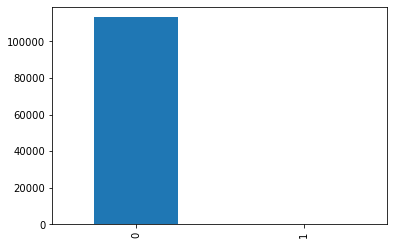



HYPOTHESIZE
H_0: house & home does not affect viral
H_a: house & home affects viral

VISUALIZE


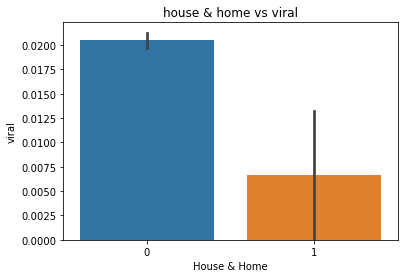


ANALYZE and SUMMARIZE
Observed
[[110877   2317]
 [   451      3]]

Expected
[[110883   2310]
 [   444      9]]

----
chi^2 = 3.6792
p-value = 0.0551
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

LIBRARIES & DEMO
0    113445
1       203
Name: Libraries & Demo, dtype: int64
0    0.998214
1    0.001786
Name: Libraries & Demo, dtype: float64


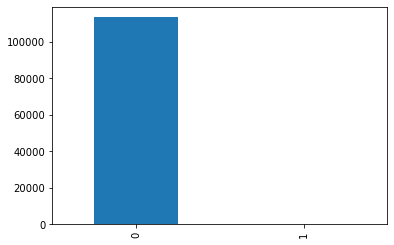



HYPOTHESIZE
H_0: libraries & demo does not affect viral
H_a: libraries & demo affects viral

VISUALIZE


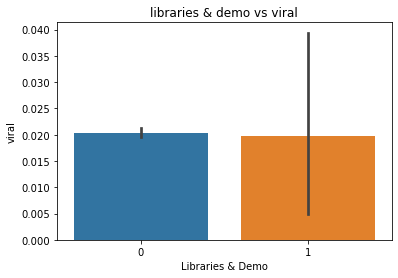


ANALYZE and SUMMARIZE
Observed
[[111129   2316]
 [   199      4]]

Expected
[[111129   2315]
 [   198      4]]

----
chi^2 = 0.0313
p-value = 0.8596
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

LIFESTYLE
0    109901
1      3747
Name: Lifestyle, dtype: int64
0    0.96703
1    0.03297
Name: Lifestyle, dtype: float64


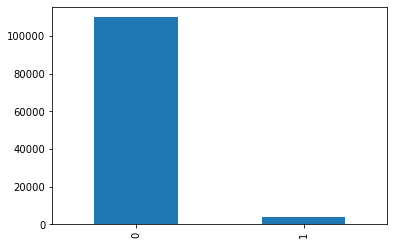



HYPOTHESIZE
H_0: lifestyle does not affect viral
H_a: lifestyle affects viral

VISUALIZE


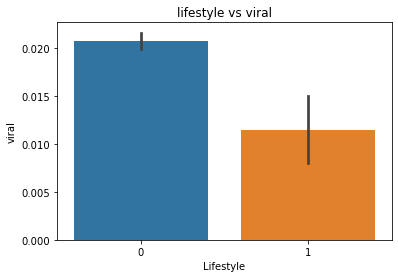


ANALYZE and SUMMARIZE
Observed
[[107624   2277]
 [  3704     43]]

Expected
[[107657   2243]
 [  3670     76]]

----
chi^2 = 15.0209
p-value = 0.0001
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

MAPS & NAVIGATION
0    112906
1       742
Name: Maps & Navigation, dtype: int64
0    0.993471
1    0.006529
Name: Maps & Navigation, dtype: float64


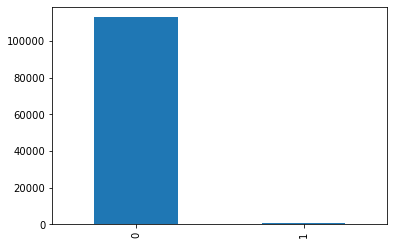



HYPOTHESIZE
H_0: maps & navigation does not affect viral
H_a: maps & navigation affects viral

VISUALIZE


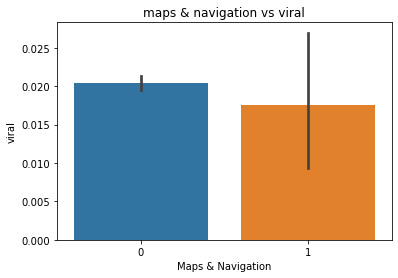


ANALYZE and SUMMARIZE
Observed
[[110599   2307]
 [   729     13]]

Expected
[[110601   2304]
 [   726     15]]

----
chi^2 = 0.1840
p-value = 0.6679
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

MEDICAL
0    112712
1       936
Name: Medical, dtype: int64
0    0.991764
1    0.008236
Name: Medical, dtype: float64


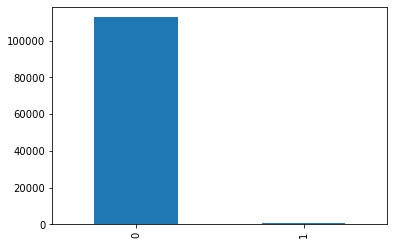



HYPOTHESIZE
H_0: medical does not affect viral
H_a: medical affects viral

VISUALIZE


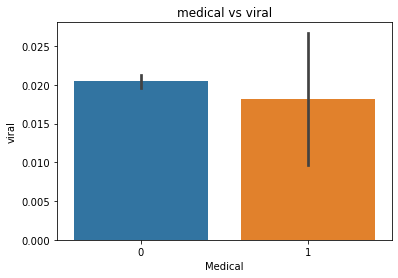


ANALYZE and SUMMARIZE
Observed
[[110409   2303]
 [   919     17]]

Expected
[[110411   2300]
 [   916     19]]

----
chi^2 = 0.1392
p-value = 0.7091
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

MUSIC
0    113097
1       551
Name: Music, dtype: int64
0    0.995152
1    0.004848
Name: Music, dtype: float64


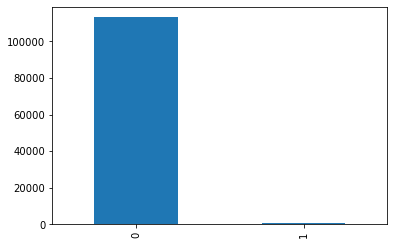



HYPOTHESIZE
H_0: music does not affect viral
H_a: music affects viral

VISUALIZE


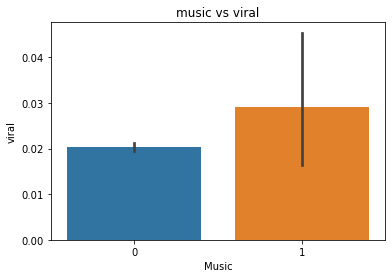


ANALYZE and SUMMARIZE
Observed
[[110793   2304]
 [   535     16]]

Expected
[[110788   2308]
 [   539     11]]

----
chi^2 = 1.6488
p-value = 0.1991
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

MUSIC & AUDIO
0    104544
1      9104
Name: Music & Audio, dtype: int64
0    0.919893
1    0.080107
Name: Music & Audio, dtype: float64


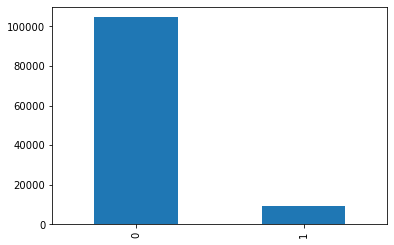



HYPOTHESIZE
H_0: music & audio does not affect viral
H_a: music & audio affects viral

VISUALIZE


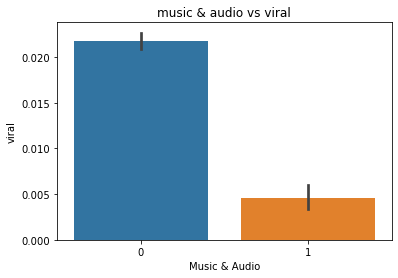


ANALYZE and SUMMARIZE
Observed
[[102266   2278]
 [  9062     42]]

Expected
[[102409   2134]
 [  8918    185]]

----
chi^2 = 122.7005
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

NEWS & MAGAZINES
0    112208
1      1440
Name: News & Magazines, dtype: int64
0    0.987329
1    0.012671
Name: News & Magazines, dtype: float64


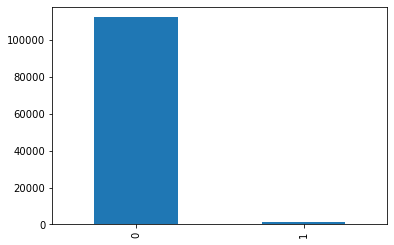



HYPOTHESIZE
H_0: news & magazines does not affect viral
H_a: news & magazines affects viral

VISUALIZE


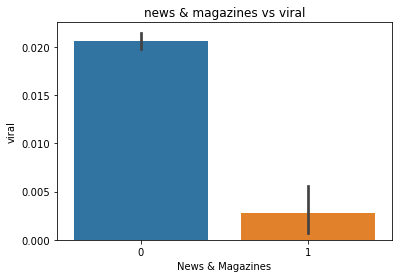


ANALYZE and SUMMARIZE
Observed
[[109892   2316]
 [  1436      4]]

Expected
[[109917   2290]
 [  1410     29]]

----
chi^2 = 21.8005
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

PARENTING
0    113429
1       219
Name: Parenting, dtype: int64
0    0.998073
1    0.001927
Name: Parenting, dtype: float64


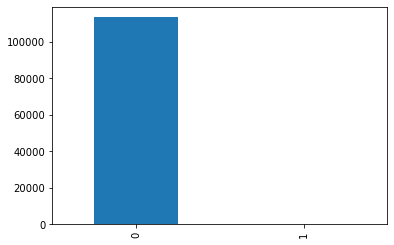



HYPOTHESIZE
H_0: parenting does not affect viral
H_a: parenting affects viral

VISUALIZE


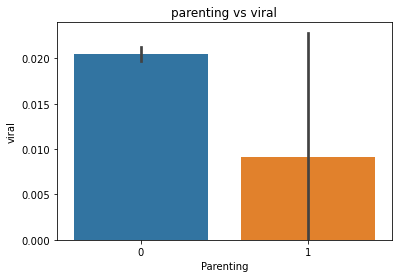


ANALYZE and SUMMARIZE
Observed
[[111111   2318]
 [   217      2]]

Expected
[[111113   2315]
 [   214      4]]

----
chi^2 = 0.8885
p-value = 0.3459
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

PERSONALIZATION
0    107629
1      6019
Name: Personalization, dtype: int64
0    0.947038
1    0.052962
Name: Personalization, dtype: float64


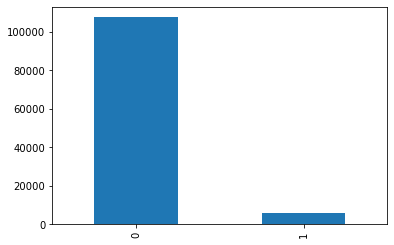



HYPOTHESIZE
H_0: personalization does not affect viral
H_a: personalization affects viral

VISUALIZE


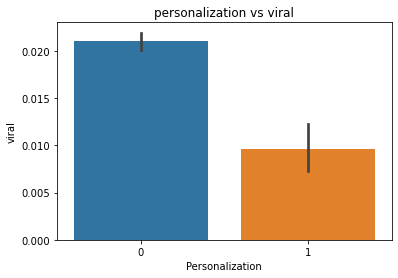


ANALYZE and SUMMARIZE
Observed
[[105367   2262]
 [  5961     58]]

Expected
[[105431   2197]
 [  5896    122]]

----
chi^2 = 36.3517
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

PHOTOGRAPHY
0    111702
1      1946
Name: Photography, dtype: int64
0    0.982877
1    0.017123
Name: Photography, dtype: float64


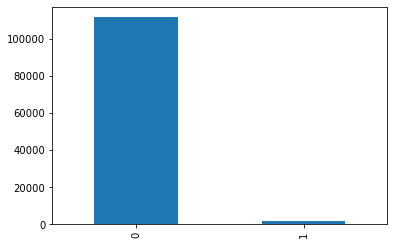



HYPOTHESIZE
H_0: photography does not affect viral
H_a: photography affects viral

VISUALIZE


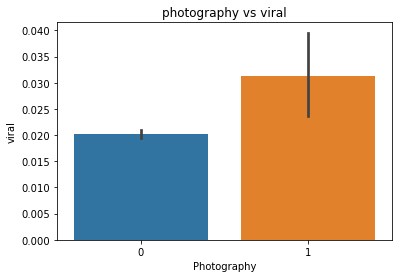


ANALYZE and SUMMARIZE
Observed
[[109443   2259]
 [  1885     61]]

Expected
[[109421   2280]
 [  1906     39]]

----
chi^2 = 11.2837
p-value = 0.0008
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

PRODUCTIVITY
0    111123
1      2525
Name: Productivity, dtype: int64
0    0.977782
1    0.022218
Name: Productivity, dtype: float64


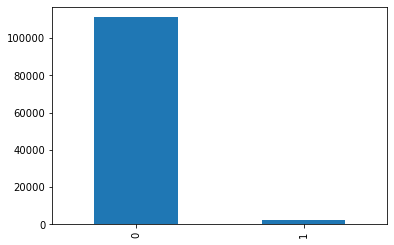



HYPOTHESIZE
H_0: productivity does not affect viral
H_a: productivity affects viral

VISUALIZE


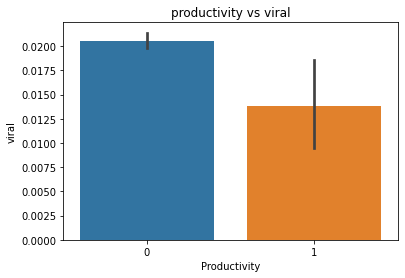


ANALYZE and SUMMARIZE
Observed
[[108838   2285]
 [  2490     35]]

Expected
[[108854   2268]
 [  2473     51]]

----
chi^2 = 5.2145
p-value = 0.0224
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

PUZZLE
0    110766
1      2882
Name: Puzzle, dtype: int64
0    0.974641
1    0.025359
Name: Puzzle, dtype: float64


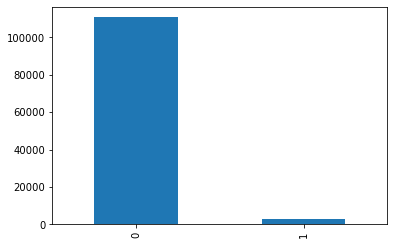



HYPOTHESIZE
H_0: puzzle does not affect viral
H_a: puzzle affects viral

VISUALIZE


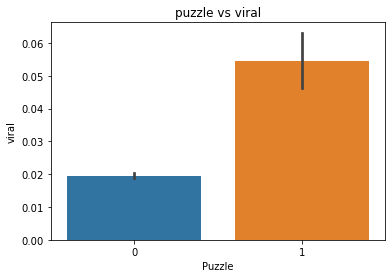


ANALYZE and SUMMARIZE
Observed
[[108603   2163]
 [  2725    157]]

Expected
[[108504   2261]
 [  2823     58]]

----
chi^2 = 169.8202
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

RACING
0    112949
1       699
Name: Racing, dtype: int64
0    0.993849
1    0.006151
Name: Racing, dtype: float64


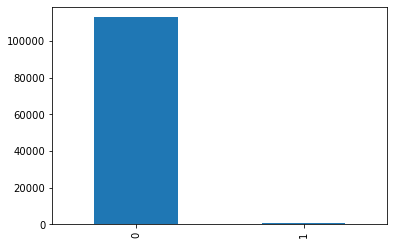



HYPOTHESIZE
H_0: racing does not affect viral
H_a: racing affects viral

VISUALIZE


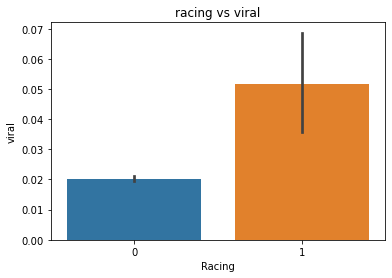


ANALYZE and SUMMARIZE
Observed
[[110665   2284]
 [   663     36]]

Expected
[[110643   2305]
 [   684     14]]

----
chi^2 = 32.4460
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

ROLE PLAYING
0    112563
1      1085
Name: Role Playing, dtype: int64
0    0.990453
1    0.009547
Name: Role Playing, dtype: float64


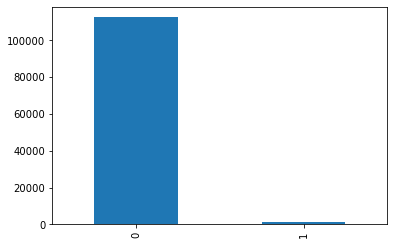



HYPOTHESIZE
H_0: role playing does not affect viral
H_a: role playing affects viral

VISUALIZE


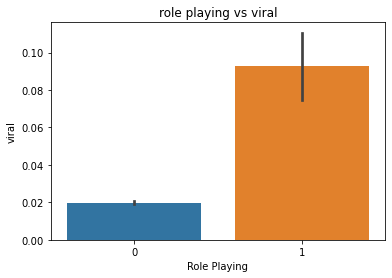


ANALYZE and SUMMARIZE
Observed
[[110344   2219]
 [   984    101]]

Expected
[[110265   2297]
 [  1062     22]]

----
chi^2 = 285.6641
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

SHOPPING
0    110135
1      3513
Name: Shopping, dtype: int64
0    0.969089
1    0.030911
Name: Shopping, dtype: float64


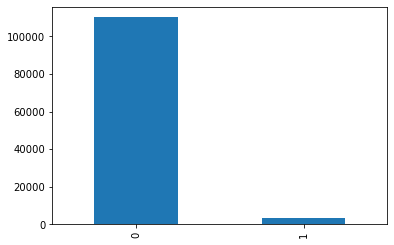



HYPOTHESIZE
H_0: shopping does not affect viral
H_a: shopping affects viral

VISUALIZE


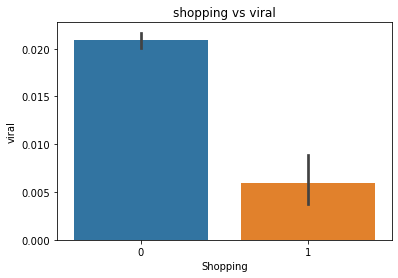


ANALYZE and SUMMARIZE
Observed
[[107836   2299]
 [  3492     21]]

Expected
[[107886   2248]
 [  3441     71]]

----
chi^2 = 37.0374
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

SIMULATION
0    111312
1      2336
Name: Simulation, dtype: int64
0    0.979445
1    0.020555
Name: Simulation, dtype: float64


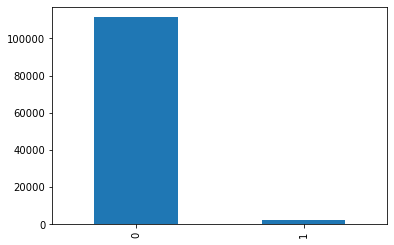



HYPOTHESIZE
H_0: simulation does not affect viral
H_a: simulation affects viral

VISUALIZE


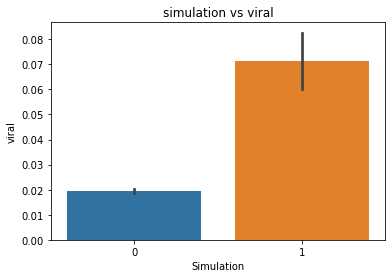


ANALYZE and SUMMARIZE
Observed
[[109159   2153]
 [  2169    167]]

Expected
[[109039   2272]
 [  2288     47]]

----
chi^2 = 308.5367
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

SOCIAL
0    110825
1      2823
Name: Social, dtype: int64
0    0.97516
1    0.02484
Name: Social, dtype: float64


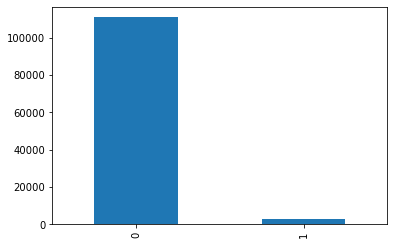



HYPOTHESIZE
H_0: social does not affect viral
H_a: social affects viral

VISUALIZE


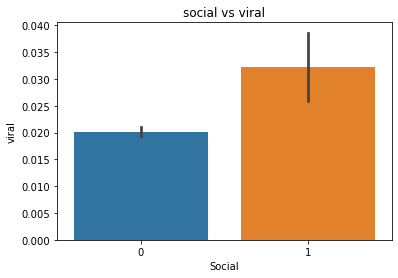


ANALYZE and SUMMARIZE
Observed
[[108596   2229]
 [  2732     91]]

Expected
[[108562   2262]
 [  2765     57]]

----
chi^2 = 19.6284
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

SPORTS
0    111550
1      2098
Name: Sports, dtype: int64
0    0.981539
1    0.018461
Name: Sports, dtype: float64


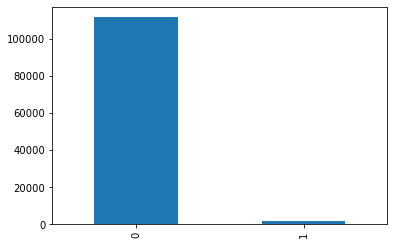



HYPOTHESIZE
H_0: sports does not affect viral
H_a: sports affects viral

VISUALIZE


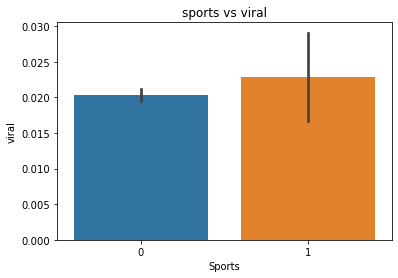


ANALYZE and SUMMARIZE
Observed
[[109278   2272]
 [  2050     48]]

Expected
[[109272   2277]
 [  2055     42]]

----
chi^2 = 0.5300
p-value = 0.4666
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

STRATEGY
0    113109
1       539
Name: Strategy, dtype: int64
0    0.995257
1    0.004743
Name: Strategy, dtype: float64


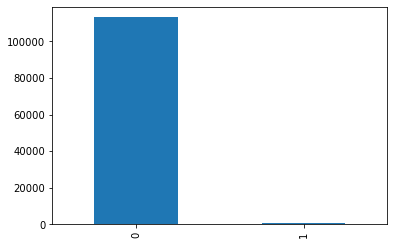



HYPOTHESIZE
H_0: strategy does not affect viral
H_a: strategy affects viral

VISUALIZE


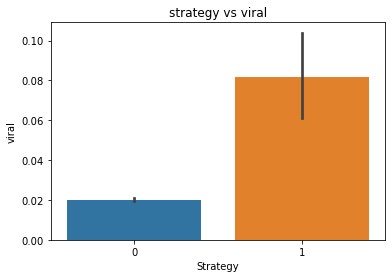


ANALYZE and SUMMARIZE
Observed
[[110833   2276]
 [   495     44]]

Expected
[[110800   2308]
 [   527     11]]

----
chi^2 = 98.4444
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

TOOLS
0    105122
1      8526
Name: Tools, dtype: int64
0    0.924979
1    0.075021
Name: Tools, dtype: float64


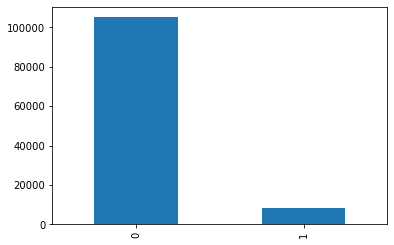



HYPOTHESIZE
H_0: tools does not affect viral
H_a: tools affects viral

VISUALIZE


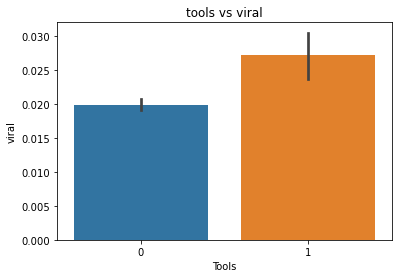


ANALYZE and SUMMARIZE
Observed
[[103034   2088]
 [  8294    232]]

Expected
[[102976   2145]
 [  8351    174]]

----
chi^2 = 20.9290
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

TRAVEL & LOCAL
0    112169
1      1479
Name: Travel & Local, dtype: int64
0    0.986986
1    0.013014
Name: Travel & Local, dtype: float64


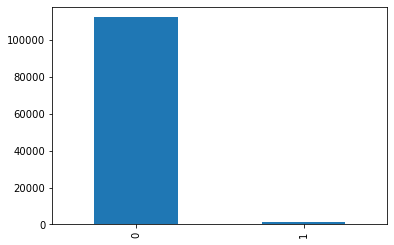



HYPOTHESIZE
H_0: travel & local does not affect viral
H_a: travel & local affects viral

VISUALIZE


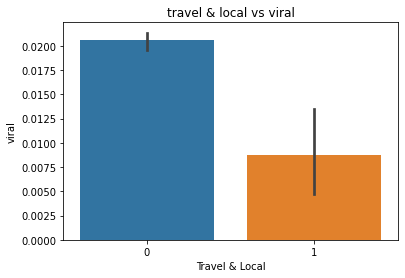


ANALYZE and SUMMARIZE
Observed
[[109862   2307]
 [  1466     13]]

Expected
[[109879   2289]
 [  1448     30]]

----
chi^2 = 9.5450
p-value = 0.0020
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

TRIVIA
0    112845
1       803
Name: Trivia, dtype: int64
0    0.992934
1    0.007066
Name: Trivia, dtype: float64


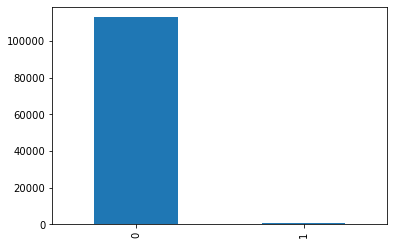



HYPOTHESIZE
H_0: trivia does not affect viral
H_a: trivia affects viral

VISUALIZE


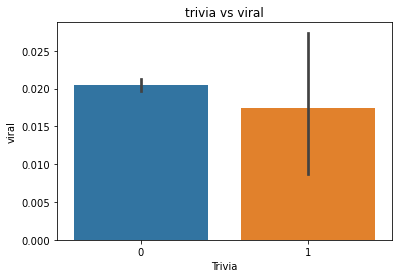


ANALYZE and SUMMARIZE
Observed
[[110539   2306]
 [   789     14]]

Expected
[[110541   2303]
 [   786     16]]

----
chi^2 = 0.2246
p-value = 0.6356
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

VIDEO PLAYERS & EDITORS
0    112070
1      1578
Name: Video Players & Editors, dtype: int64
0    0.986115
1    0.013885
Name: Video Players & Editors, dtype: float64


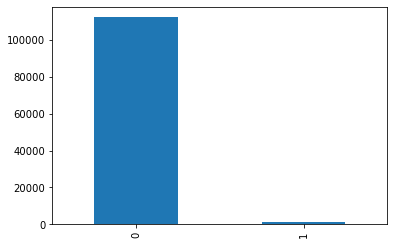



HYPOTHESIZE
H_0: video players & editors does not affect viral
H_a: video players & editors affects viral

VISUALIZE


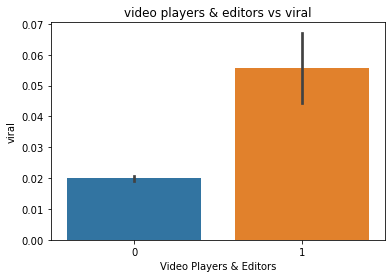


ANALYZE and SUMMARIZE
Observed
[[109838   2232]
 [  1490     88]]

Expected
[[109782   2287]
 [  1545     32]]

----
chi^2 = 98.2291
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

WEATHER
0    113158
1       490
Name: Weather, dtype: int64
0    0.995688
1    0.004312
Name: Weather, dtype: float64


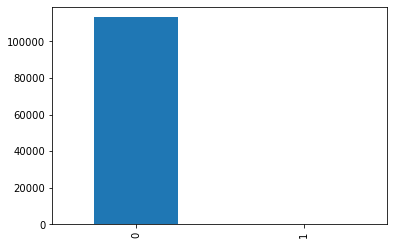



HYPOTHESIZE
H_0: weather does not affect viral
H_a: weather affects viral

VISUALIZE


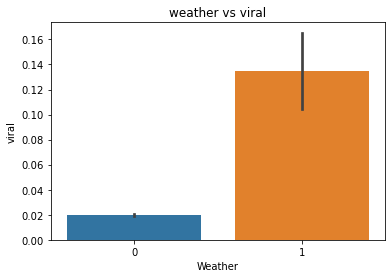


ANALYZE and SUMMARIZE
Observed
[[110904   2254]
 [   424     66]]

Expected
[[110848   2309]
 [   479     10]]

----
chi^2 = 315.6847
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

WORD
0    113018
1       630
Name: Word, dtype: int64
0    0.994457
1    0.005543
Name: Word, dtype: float64


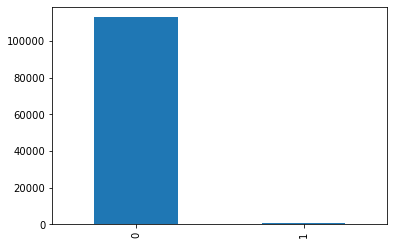



HYPOTHESIZE
H_0: word does not affect viral
H_a: word affects viral

VISUALIZE


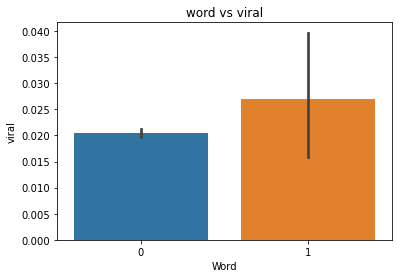


ANALYZE and SUMMARIZE
Observed
[[110715   2303]
 [   613     17]]

Expected
[[110710   2307]
 [   617     12]]

----
chi^2 = 1.0571
p-value = 0.3039
----
We fail to reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

SAME_DEV_ID
1    62793
0    50855
Name: same_dev_id, dtype: int64
1    0.552522
0    0.447478
Name: same_dev_id, dtype: float64


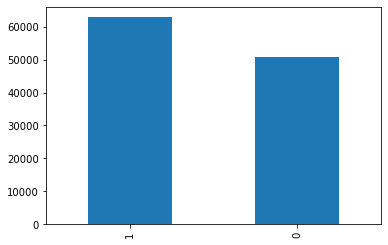



HYPOTHESIZE
H_0: same dev id does not affect viral
H_a: same dev id affects viral

VISUALIZE


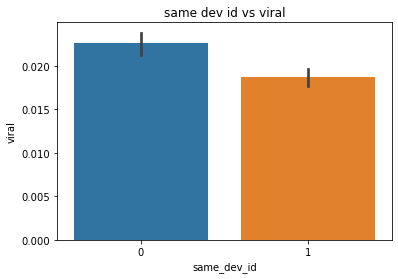


ANALYZE and SUMMARIZE
Observed
[[49707  1148]
 [61621  1172]]

Expected
[[49816  1038]
 [61511  1281]]

----
chi^2 = 21.2809
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------

VIRAL
0    111328
1      2320
Name: viral, dtype: int64
0    0.979586
1    0.020414
Name: viral, dtype: float64


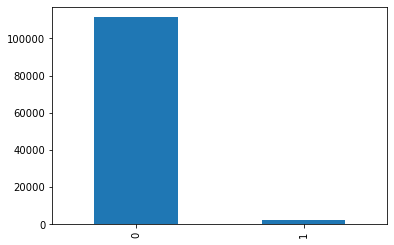



HYPOTHESIZE
H_0: viral does not affect viral
H_a: viral affects viral

VISUALIZE


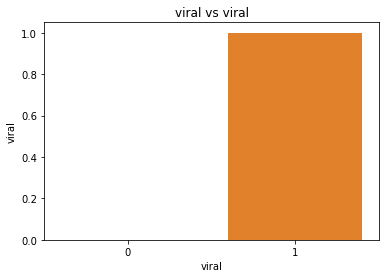


ANALYZE and SUMMARIZE
Observed
[[111328      0]
 [     0   2320]]

Expected
[[109055   2272]
 [  2272     47]]

----
chi^2 = 113597.9985
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------
This is your list of rejected features ['Beauty', 'Board', 'Card', 'Casino', 'Comics', 'Communication', 'Dating', 'Events', 'House & Home', 'Libraries & Demo', 'Maps & Navigation', 'Medical', 'Music', 'Parenting', 'Sports', 'Trivia', 'Word']


In [27]:
list_of_rejected_features=gw.cat_on_cat_graph_loop(train_df,"viral", "viral")  
print(f"This is your list of rejected features {list_of_rejected_features}")


<div class="alert alert-block alert-info">  

### Explore Takeaways:

<div class="alert alert-block alert-info"> 

## Preprocessing

* Encode any categoricals

* Clusted Features:
    * None for this iteration<br>
    
    
* Split into X_train, y_train, X_validate, y_validate, X_test, y_test


### Droping features that failed the chi^2 test

In [63]:
train_df.head()

,app_name,rating,free,price,ad_supported,in_app_purchases,editors_choice,file_size,Everyone,Everyone 10+,...,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,days_since_release,same_dev_id,viral
2125487,Lollipop Animal,4.4,1,0.0,1,1,0,53000.0,1,0,...,0,0,0,0,0,0,0,370,0,0
978016,kiki tell,4.0,1,0.0,0,0,0,6.7,1,0,...,0,0,0,0,0,0,0,510,1,0
1291503,Short Video Maker-Made in India,4.0,1,0.0,1,0,0,13000.0,1,0,...,0,0,0,0,0,0,0,181,0,0
383660,كويكول - حنان لاشين,4.8,1,0.0,1,0,0,11000.0,1,0,...,0,0,0,0,0,0,0,406,1,0
81001,চৈতন্যচরিতামৃত মধ্যলীলা (Chaitanya Charitamrita),0.0,1,0.0,1,0,0,99000.0,1,0,...,0,0,0,0,0,0,0,275,0,0


In [44]:
print(list_of_rejected_features)

['Beauty', 'Board', 'Card', 'Casino', 'Comics', 'Communication', 'Dating', 'Events', 'House & Home', 'Libraries & Demo', 'Maps & Navigation', 'Medical', 'Music', 'Parenting', 'Sports', 'Trivia', 'Word']


In [97]:
X_train = train_df[['in_app_purchases','file_size','editors_choice','Everyone 10+','Everyone','Weather','Simulation','rating','Role Playing','ad_supported','Education','Puzzle','Casual','Teen','Music & Audio','Strategy','Video Players & Editors','Books & Reference']]
y_train = train_df.viral
X_validate = validate_df[['in_app_purchases','file_size','editors_choice','Everyone 10+','Everyone','Weather','Simulation','rating','Role Playing','ad_supported','Education','Puzzle','Casual','Teen','Music & Audio','Strategy','Video Players & Editors','Books & Reference']]
y_validate = validate_df.viral
X_test = test_df[['in_app_purchases','file_size','editors_choice','Everyone 10+','Everyone','Weather','Simulation','rating','Role Playing','ad_supported','Education','Puzzle','Casual','Teen','Music & Audio','Strategy','Video Players & Editors','Books & Reference']] 
y_test = test_df.viral

In [28]:
#selects all columns except first one and target for X_train and y_train etc.
X_train = train_df.iloc[:, 1:-1]
X_train = X_train.drop(columns=list_of_rejected_features)
y_train = train_df.viral
X_validate = validate_df.iloc[:, 1:-1]
X_validate = X_validate.drop(columns=list_of_rejected_features)
y_validate = validate_df.viral
X_test = test_df.iloc[:, 1:-1]
X_test = X_test.drop(columns=list_of_rejected_features)   
y_test = test_df.viral

In [26]:
train_scaled, validate_scaled, test_scaled = gw.scale_data(X_train, X_validate, X_test)

In [27]:
kbest_results=gw.select_kbest(train_scaled, y_train)

In [28]:
#drop nan rows
kbest_results.dropna(inplace=True)

In [29]:
kbest_results.sort_values(by="f_score", ascending=False)

,p_value,f_score
in_app_purchases,0.000000e+00,3481.651628
file_size,0.000000e+00,1953.541036
editors_choice,1.909608e-175,800.283558
Everyone 10+,7.705595e-106,478.446363
Everyone,5.025891e-84,377.843811
Weather,5.736066e-72,322.304469
Simulation,9.991718e-70,311.987692
rating,2.384413e-65,291.840211
Role Playing,5.825880e-65,290.055017
ad_supported,1.077131e-50,224.459157


In [35]:
#selects top 10 values and makes list
top_10_features = list(kbest_results.nlargest(18, "f_score").index)
top_10_features

['in_app_purchases',
 'file_size',
 'editors_choice',
 'Everyone 10+',
 'Everyone',
 'Weather',
 'Simulation',
 'rating',
 'Role Playing',
 'ad_supported',
 'Education',
 'Puzzle',
 'Casual',
 'Teen',
 'Music & Audio',
 'Strategy',
 'Video Players & Editors',
 'Books & Reference']

<div class="alert alert-block alert-info"> 
    
# Modeling Overview
        
## Features to Used    
* All features were used except for those except for those eliminated by statistical testing
   
---
# Models Used and Metrics       

## **Classification Models Used:**
    
* K-Nearest Neighbors
* Random Forest
* Gradient Boosting Classifier
 
#### Baseline: 97.96%    
#### Accuracy and precision are the evaluation metrics

### Modeling on selected features


### Model on all features

In [51]:
#baseline accuracy
baseline_accuracy = (y_train == 0).mean()
print(f"The baseline accuracy is: {baseline_accuracy}")

The baseline accuracy is: 0.9795860903843446


In [58]:
'''
Takes too long to run

clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", degree=1, gamma=16))   
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_validate, y_validate))
y_pred = clf.predict(X_validate)
print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))'''

In [101]:
am.auto_random_forest_scores(X_train, y_train, X_validate, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
14         19        0.983264           0.979965  0.003299
13         18        0.982472           0.980044  0.002428
12         17        0.981583           0.979859  0.001724
11         16        0.981082           0.979806  0.001276
10         15        0.980800           0.979833  0.000968
9          14        0.980431           0.979753  0.000677
8          13        0.980193           0.979727  0.000466
7          12        0.979964           0.979753  0.000211
5          10        0.979832           0.979674  0.000158
6          11        0.979876           0.979727  0.000149
4           9        0.979771           0.979674  0.000097
3           8        0.979753           0.979674  0.000079
2           7        0.979665           0.979621  0.000044
1           6        0.979595           0.979569  0.000026
0           5        0.979586           0.979569  0.000017


In [53]:
am.auto_knn_scores(X_train, y_train, X_validate, y_validate)

   k  train_accuracy  validate_accuracy     delta
0  3        0.980915           0.977272  0.003643
2  5        0.979841           0.979226  0.000616
1  4        0.979815           0.979437  0.000378


In [102]:
am.auto_lo_regress_scores(X_train, y_train, X_validate, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
0           5        0.979516           0.979489  0.000026
1           6        0.979516           0.979489  0.000026
2           7        0.979516           0.979489  0.000026
3           8        0.979516           0.979489  0.000026
4           9        0.979516           0.979489  0.000026
5          10        0.979516           0.979489  0.000026
6          11        0.979516           0.979489  0.000026
7          12        0.979516           0.979489  0.000026
8          13        0.979516           0.979489  0.000026
9          14        0.979516           0.979489  0.000026
10         15        0.979516           0.979489  0.000026
11         16        0.979516           0.979489  0.000026
12         17        0.979516           0.979489  0.000026
13         18        0.979516           0.979489  0.000026
14         19        0.979516           0.979489  0.000026


In [57]:
#GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=123).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_validate, y_validate))
y_pred = clf.predict(X_validate)
print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

0.9797268759679009
0.9797006572869097
                      0           1  accuracy     macro avg  weighted avg
precision      0.979749    0.777778  0.979701      0.878763      0.975622
recall         0.999946    0.009044  0.979701      0.504495      0.979701
f1-score       0.989744    0.017880  0.979701      0.503812      0.969888
support    37109.000000  774.000000  0.979701  37883.000000  37883.000000


In [44]:
rf = RandomForestClassifier(criterion="entropy",random_state=123, max_depth=18) #increases the sample leaf whild decreasing max depth
        #fit it
rf.fit(X_train, y_train)
        #transform it
train_acc = rf.score(X_train, y_train)
y_pred = rf.predict(X_train)
        #conf = confusion_matrix(y_train, y_pred)
    
        
        #evaluate on my validate data
val_acc = rf.score(X_validate, y_validate)
y_vpred = rf.predict(X_validate)
print(pd.DataFrame(classification_report(y_validate, y_vpred, output_dict=True)))
print(val_acc)

                      0           1  accuracy     macro avg  weighted avg
precision      0.980161    0.821429  0.980044      0.900795      0.976918
recall         0.999865    0.029716  0.980044      0.514791      0.980044
f1-score       0.989915    0.057357  0.980044      0.523636      0.970862
support    37109.000000  774.000000  0.980044  37883.000000  37883.000000
0.9800438191273131


In [45]:
# Random Forest Classifier Ensemble 
clf1 = RandomForestClassifier(criterion="entropy",random_state=123, max_depth=18)
clf2 = RandomForestClassifier(criterion="entropy",random_state=999, max_depth=18)
clf3 = RandomForestClassifier(criterion="entropy",random_state=789, max_depth=18)

eclf = VotingClassifier(estimators=[('dt1', clf1), ('dt2', clf2),
                                    ('dt3', clf3)],
                        voting='soft', weights=[1, 1, 1])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)

eclf = eclf.fit(X_train, y_train)


print(f"DT1: {clf1.score(X_train, y_train)}")
print(f"DT2: {clf2.score(X_train, y_train)}")
print(f"DT3: {clf3.score(X_train, y_train)}")

print(f"Ensemble: {eclf.score(X_train, y_train)}")
print("---------------------------------------------")
print(f"DT1: {clf1.score(X_validate, y_validate)}")
print(f"DT2: {clf2.score(X_validate, y_validate)}")
print(f"DT3: {clf3.score(X_validate, y_validate)}")

print(f"Ensemble: {eclf.score(X_validate, y_validate)}")
print("---------------------------------------------")
y_vpred = eclf.predict(X_validate)
print(pd.DataFrame(classification_report(y_validate, y_vpred, output_dict=True)))

DT1: 0.9813283119808531
DT2: 0.981389905673659
DT3: 0.9813723074757145
Ensemble: 0.9813283119808531
---------------------------------------------
DT1: 0.979779848480849
DT2: 0.9797534514162025
DT3: 0.9798326426101418
Ensemble: 0.9798062455454953
---------------------------------------------
                      0           1  accuracy     macro avg  weighted avg
precision      0.979852    0.846154  0.979806      0.913003      0.977120
recall         0.999946    0.014212  0.979806      0.507079      0.979806
f1-score       0.989797    0.027954  0.979806      0.508876      0.970145
support    37109.000000  774.000000  0.979806  37883.000000  37883.000000


In [38]:
boost = AdaBoostClassifier(n_estimators=200)
boost.fit(X_train, y_train)
train_acc = boost.score(X_train, y_train)
y_pred = boost.predict(X_train)
val_acc = boost.score(X_validate, y_validate)
y_vpred = boost.predict(X_validate)
print(pd.DataFrame(classification_report(y_validate, y_vpred, output_dict=True)))
print(val_acc)

                      0           1  accuracy     macro avg  weighted avg
precision      0.979748    0.700000  0.979674      0.839874      0.974032
recall         0.999919    0.009044  0.979674      0.504482      0.979674
f1-score       0.989731    0.017857  0.979674      0.503794      0.969874
support    37109.000000  774.000000  0.979674  37883.000000  37883.000000
0.9796742602222633


In [55]:
gboost= GradientBoostingClassifier(n_estimators=500, learning_rate=.5,max_depth=1, random_state=123)
gboost.fit(X_train, y_train)    
train_acc = gboost.score(X_train, y_train)
y_pred = gboost.predict(X_train)
val_acc = gboost.score(X_validate, y_validate)
y_vpred = gboost.predict(X_validate)
print(pd.DataFrame(classification_report(y_validate, y_vpred, output_dict=True)))
print(val_acc)

                      0           1  accuracy     macro avg  weighted avg
precision      0.979749    0.777778  0.979701      0.878763      0.975622
recall         0.999946    0.009044  0.979701      0.504495      0.979701
f1-score       0.989744    0.017880  0.979701      0.503812      0.969888
support    37109.000000  774.000000  0.979701  37883.000000  37883.000000
0.9797006572869097


<div class="alert alert-block alert-info">

## Initial model performance
### Out of initial models random forest at a depth of 18 had the highest accuracy at 98.00% (beatig the baseline of 97.96%) with relatively high precision
### Precision scores for the model:
    - Viral No : 98.02%
    - Viral Yes : 82.14%

<div class="alert alert-block alert-info">
    
# Model conclusions

<div class="alert alert-block alert-info">
    
# Project Conclusion
    

### Explore:
    
* 
  
* 
  
* 
  
* 
    
### Modeling:
    

    
### Recommendations and Next Steps:
 
* For the data engineers: 
* For the data scientsists: 
* For the business: 